# Task
Analyze a data using six different machine learning models ; logistic regression, random forest, support vector machine, extreme gradient boosting , naive bayes classifier and k- nearest neighbors.  check the feature importance and also the models performances using the Balance Accuracy, Accuracy, Sensitivity, Specificity, F1 score and Precision,AUROC, AUPRC.





In [ ]:

from google.colab import drive

drive.mount('/content/drive')

# Correct way to read the CSV file
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/data_female.csv')
display(df.head())
print(df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,country,gender,age_int,partnerinhh,country_new,sphus_new,chronicw9_new,adl2_new,iadl2_new,eurod_new,isced1997_r_new,age_group
0,Austria,Female,70,Yes,Austria,Good health,Chronic disease,No limitations,No limitations,Not depressed,Higher secondary education,65-79
1,Austria,Female,81,No,Austria,Poor health,Chronic disease,No limitations,No limitations,Not depressed,Higher secondary education,80 and above
2,Austria,Female,86,Yes,Austria,Good health,No chronic disease,No limitations,No limitations,Depressed,Higher secondary education,80 and above
3,Austria,Female,70,No,Austria,Good health,Chronic disease,No limitations,No limitations,Not depressed,Post-secondary education,65-79
4,Austria,Female,55,Yes,Austria,Good health,No chronic disease,No limitations,No limitations,Not depressed,Higher secondary education,50-64


(33645, 12)


## Data loading



In [ ]:
print(df.info())
print(df['age_group'].unique())
# Check if 'Unnamed: 0' column exists before dropping
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
# Convert 'age2022' to numeric, coercing errors to NaN
#df['age2022'] = pd.to_numeric(df['age2022'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33645 entries, 0 to 33644
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          33645 non-null  object
 1   gender           33645 non-null  object
 2   age_int          33645 non-null  int64 
 3   partnerinhh      33645 non-null  object
 4   country_new      33645 non-null  object
 5   sphus_new        33645 non-null  object
 6   chronicw9_new    33645 non-null  object
 7   adl2_new         33645 non-null  object
 8   iadl2_new        33645 non-null  object
 9   eurod_new        33645 non-null  object
 10  isced1997_r_new  33645 non-null  object
 11  age_group        33645 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.1+ MB
None
['65-79' '80 and above' '50-64']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33645 entries, 0 to 33644
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------       

Data Shape: (33645, 12)

Data Types:
 country            object
gender             object
age_int             int64
partnerinhh        object
country_new        object
sphus_new          object
chronicw9_new      object
adl2_new           object
iadl2_new          object
eurod_new          object
isced1997_r_new    object
age_group          object
dtype: object

Descriptive Statistics:
         country  gender       age_int partnerinhh country_new    sphus_new  \
count     33645   33645  33645.000000       33645       33645        33645   
unique       24       1           NaN           2          24            2   
top     Estonia  Female           NaN         Yes     Estonia  Good health   
freq       4609   33645           NaN       18995        4609        20524   
mean        NaN     NaN     69.577352         NaN         NaN          NaN   
std         NaN     NaN      9.903926         NaN         NaN          NaN   
min         NaN     NaN     50.000000         NaN         NaN   

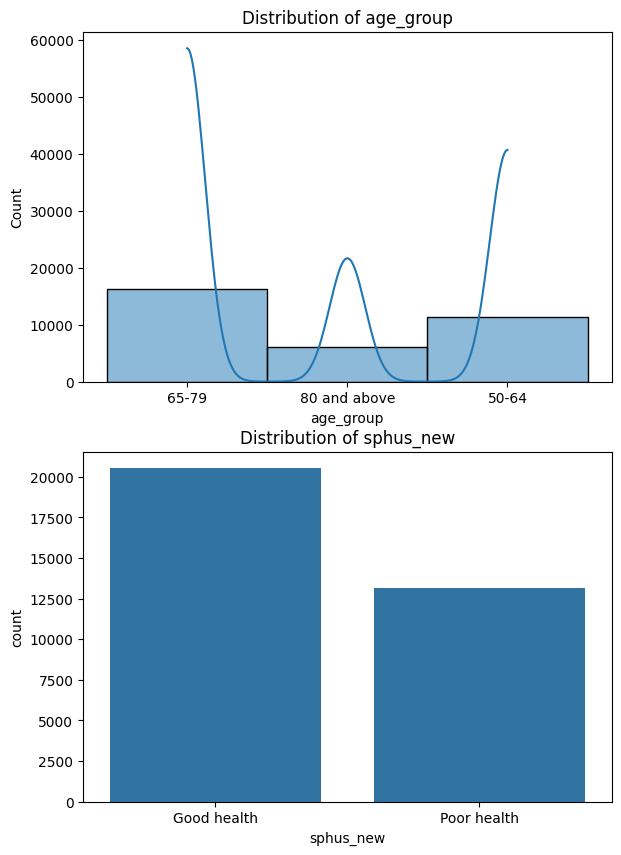

In [ ]:
# Examine Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# Visualize Variable Distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Histograms for numerical features
# Changed 'age-group' to 'age_group'
for i, col in enumerate(['age_group']):  # Only numerical features
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

# Target variable distribution
plt.subplot(2,2,3)
sns.countplot(x='sphus_new', data=df)
plt.title('Distribution of sphus_new')



# Missing Values Analysis
print("\nMissing Values Percentage:\n", df.isnull().sum() / len(df) * 100)

# Unique Value Counts
for col in df.columns:
    print(f"\nUnique values and counts for {col}:\n{df[col].value_counts()}")



## Data exploration




Explore the data in `model_df` by checking its shape, data types, missing values, and distributions of key variables, and calculate the correlation matrix for numerical features.



In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicated rows: {df.duplicated().sum()}")

# Select relevant columns for modeling

model_df = df[['age_group', 'gender', 'sphus_new', 'chronicw9_new', 'adl2_new', 'iadl2_new', 'eurod_new', 'isced1997_r_new']]

# Display the first few rows and shape of the prepared DataFrame
display(model_df.head())
print(model_df.shape)

print(df.info())
print(df['age_group'].unique())
# Check if 'Unnamed: 0' column exists before dropping
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
# Convert 'age2022' to numeric, coercing errors to NaN
#df['age2022'] = pd.to_numeric(df['age2022'], errors='coerce')
print(df.info())

country            0
gender             0
age_int            0
partnerinhh        0
country_new        0
sphus_new          0
chronicw9_new      0
adl2_new           0
iadl2_new          0
eurod_new          0
isced1997_r_new    0
age_group          0
dtype: int64
Number of duplicated rows: 15588


,age_group,gender,sphus_new,chronicw9_new,adl2_new,iadl2_new,eurod_new,isced1997_r_new
0,65-79,Female,Good health,Chronic disease,No limitations,No limitations,Not depressed,Higher secondary education
1,80 and above,Female,Poor health,Chronic disease,No limitations,No limitations,Not depressed,Higher secondary education
2,80 and above,Female,Good health,No chronic disease,No limitations,No limitations,Depressed,Higher secondary education
3,65-79,Female,Good health,Chronic disease,No limitations,No limitations,Not depressed,Post-secondary education
4,50-64,Female,Good health,No chronic disease,No limitations,No limitations,Not depressed,Higher secondary education


(33645, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33645 entries, 0 to 33644
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          33645 non-null  object
 1   gender           33645 non-null  object
 2   age_int          33645 non-null  int64 
 3   partnerinhh      33645 non-null  object
 4   country_new      33645 non-null  object
 5   sphus_new        33645 non-null  object
 6   chronicw9_new    33645 non-null  object
 7   adl2_new         33645 non-null  object
 8   iadl2_new        33645 non-null  object
 9   eurod_new        33645 non-null  object
 10  isced1997_r_new  33645 non-null  object
 11  age_group        33645 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.1+ MB
None
['65-79' '80 and above' '50-64']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33645 entries, 0 to 33644
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  --

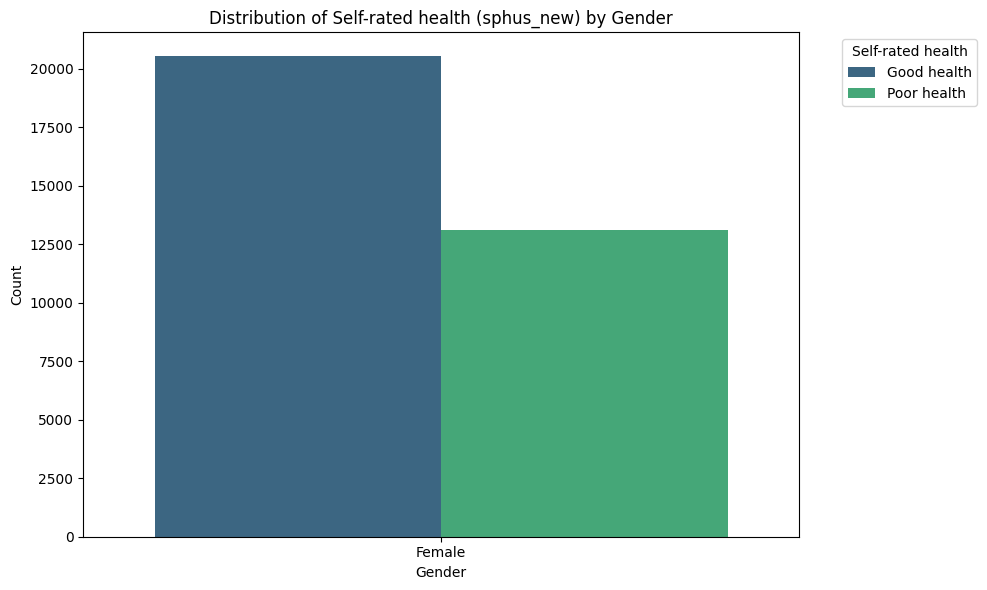

In [ ]:


import matplotlib.pyplot as plt
# Group by 'gender' and 'sphus_new' and count occurrences
gender_srh_counts = df.groupby(['gender', 'sphus_new']).size().reset_index(name='count')

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_srh_counts, x='gender', y='count', hue='sphus_new', palette='viridis')
plt.title('Distribution of Self-rated health (sphus_new) by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Self-rated health', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#student t test and chi square test among all the variables

import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency



relevant_cols = ['sphus_new', 'gender','chronicw9_new', 'adl2_new', 'iadl2_new', 'eurod_new', 'isced1997_r_new']
analysis_df = df[relevant_cols].copy()

# Convert categorical variables to numeric for t-tests (if applicable)
# Identify which columns are categorical and which are potentially numeric/ordinal
# Assuming 'sphus_new', 'chronicw9_new', 'adl2_new', 'iadl2_new', 'eurod_new', 'isced1997_r_new' are categorical
# We need to decide how to treat them for statistical tests.
# For simplicity, let's assume 'sphus_new' is the target binary variable for t-tests (e.g., Good vs Poor health)
# And other variables are features.

# Example: Perform t-tests comparing features between 'Good health' and 'Poor health' groups
# This is only appropriate if the features are numerical and the assumptions for t-tests are met.
# If the features are categorical, chi-square tests are more appropriate.

# Let's first identify categorical and numerical columns among the relevant ones.
# Based on the column names, they seem to be mostly categorical.
# We will perform chi-square tests for independence between 'sphus_new' and the other categorical features.
# If any feature was truly continuous and normally distributed, we would consider t-tests.

print("--- Chi-Square Tests of Independence ---")
# Perform Chi-Square tests for independence between 'sphus_new' and other categorical variables
categorical_features = ['chronicw9_new', 'adl2_new', 'iadl2_new', 'eurod_new', 'isced1997_r_new']

for feature in categorical_features:
  print(f"\nTesting independence between 'sphus_new' and '{feature}':")
  # Create a contingency table
  contingency_table = pd.crosstab(analysis_df['sphus_new'], analysis_df[feature])
  print("Contingency Table:")
  display(contingency_table)

  # Perform the Chi-Square test
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(f"Chi-Square Statistic: {chi2:.4f}")
  print(f"P-value: {p:.4f}")
  print(f"Degrees of Freedom: {dof}")
  # print("Expected Frequencies:")
  # print(expected)

  # Interpret the result
  alpha = 0.05
  if p < alpha:
    print(f"Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and '{feature}'.")
  else:
    print(f"Result: Fail to reject the null hypothesis. There is no statistically significant association between 'sphus_new' and '{feature}'.")







# Since the features are categorical, we primarily rely on the chi-square test results.
# If you need to perform t-tests, you would need to carefully select appropriate numerical variables
# and potentially transform categorical variables (e.g., ordinal encoding or creating dummy variables
# if meaningful for a numerical test, though chi-square is generally preferred for independence of categories).

--- Chi-Square Tests of Independence ---

Testing independence between 'sphus_new' and 'chronicw9_new':
Contingency Table:


chronicw9_new,Chronic disease,No chronic disease
sphus_new,,
Good health,14430,6094
Poor health,12496,625


Chi-Square Statistic: 3110.6773
P-value: 0.0000
Degrees of Freedom: 1
Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and 'chronicw9_new'.

Testing independence between 'sphus_new' and 'adl2_new':
Contingency Table:


adl2_new,Limited,No limitations
sphus_new,,
Good health,688,19836
Poor health,2754,10367


Chi-Square Statistic: 2709.1574
P-value: 0.0000
Degrees of Freedom: 1
Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and 'adl2_new'.

Testing independence between 'sphus_new' and 'iadl2_new':
Contingency Table:


iadl2_new,Limited,No limitations
sphus_new,,
Good health,1599,18925
Poor health,4665,8456


Chi-Square Statistic: 4069.8641
P-value: 0.0000
Degrees of Freedom: 1
Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and 'iadl2_new'.

Testing independence between 'sphus_new' and 'eurod_new':
Contingency Table:


eurod_new,Depressed,Not depressed
sphus_new,,
Good health,3623,16901
Poor health,6574,6547


Chi-Square Statistic: 3988.8133
P-value: 0.0000
Degrees of Freedom: 1
Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and 'eurod_new'.

Testing independence between 'sphus_new' and 'isced1997_r_new':
Contingency Table:


isced1997_r_new,Higher secondary education,Lower secondary education,Post-secondary education
sphus_new,,,
Good health,9384,5248,5892
Poor health,5740,4940,2441


Chi-Square Statistic: 722.5683
P-value: 0.0000
Degrees of Freedom: 2
Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and 'isced1997_r_new'.


In [ ]:
# check if Differences between each variable are statistically significant

import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency

# Interpretation of Chi-Square Test Results:
# For each categorical feature, the Chi-Square test was performed to assess if there is a
# statistically significant association between that feature and 'sphus_new'.
#
# - If the P-value is less than the significance level (commonly 0.05), we reject the null hypothesis
#   of independence. This means there is a statistically significant relationship between the two variables.
#   The differences in the distribution of 'sphus_new' across the categories of the feature are unlikely
#   to be due to random chance.
# - If the P-value is greater than or equal to the significance level (0.05), we fail to reject the null
#   hypothesis. This suggests there is no statistically significant evidence of an association between
#   the two variables in the sample. The observed differences are likely due to random variation.
#
# Based on the output of the preceding Chi-Square tests:
# - For each feature ('chronicw9_new', 'adl2_new', 'iadl2_new', 'eurod_new', 'isced1997_r_new'),
#   examine the printed P-value.
# - If P < 0.05, the differences in 'sphus_new' distribution across the categories of that feature
#   are statistically significant.
# - If P >= 0.05, the differences are not statistically significant.



if 'analysis_df' not in globals() or 'categorical_features' not in globals():
    print("Required variables 'analysis_df' or 'categorical_features' not found. Please run the preceding cells.")
else:
    print("\nSummary of Statistical Significance:")


    # To make this block directly executable and provide a summary based on the *calculated* p-values:
    # (This requires re-calculating the p-values or accessing them if they were stored)

    # Let's recalculate just the p-values for the summary:
    p_values = {}
    for feature in categorical_features:
      contingency_table = pd.crosstab(analysis_df['sphus_new'], analysis_df[feature])
      chi2, p, dof, expected = chi2_contingency(contingency_table)
      p_values[feature] = p

    print("\nConcise Summary of Statistical Significance (based on Chi-Square p-values):")
    alpha = 0.05
    for feature, p_value in p_values.items():
      if p_value < alpha:
        print(f"- Association between 'sphus_new' and '{feature}' is statistically significant (p={p_value:.4f}).")
      else:
        print(f"- Association between 'sphus_new' and '{feature}' is not statistically significant (p={p_value:.4f}).")


Summary of Statistical Significance:

Concise Summary of Statistical Significance (based on Chi-Square p-values):
- Association between 'sphus_new' and 'chronicw9_new' is statistically significant (p=0.0000).
- Association between 'sphus_new' and 'adl2_new' is statistically significant (p=0.0000).
- Association between 'sphus_new' and 'iadl2_new' is statistically significant (p=0.0000).
- Association between 'sphus_new' and 'eurod_new' is statistically significant (p=0.0000).
- Association between 'sphus_new' and 'isced1997_r_new' is statistically significant (p=0.0000).


## Data preparation

Prepare the data for model training and converting categorical variables to numerical representations.



Convert categorical features to numerical representations using one-hot encoding and handle the target variable appropriately.  Then, verify the data types of all columns in the resulting DataFrame.



In [ ]:
import pandas as pd

# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(model_df, drop_first=True)

# Verify data types
print(df_encoded.dtypes)

display(df_encoded.head())

age_group_65-79                              bool
age_group_80 and above                       bool
sphus_new_Poor health                        bool
chronicw9_new_No chronic disease             bool
adl2_new_No limitations                      bool
iadl2_new_No limitations                     bool
eurod_new_Not depressed                      bool
isced1997_r_new_Lower secondary education    bool
isced1997_r_new_Post-secondary education     bool
dtype: object


,age_group_65-79,age_group_80 and above,sphus_new_Poor health,chronicw9_new_No chronic disease,adl2_new_No limitations,iadl2_new_No limitations,eurod_new_Not depressed,isced1997_r_new_Lower secondary education,isced1997_r_new_Post-secondary education
0,True,False,False,False,True,True,True,False,False
1,False,True,True,False,True,True,True,False,False
2,False,True,False,True,True,True,False,False,False
3,True,False,False,False,True,True,True,False,True
4,False,False,False,True,True,True,True,False,False


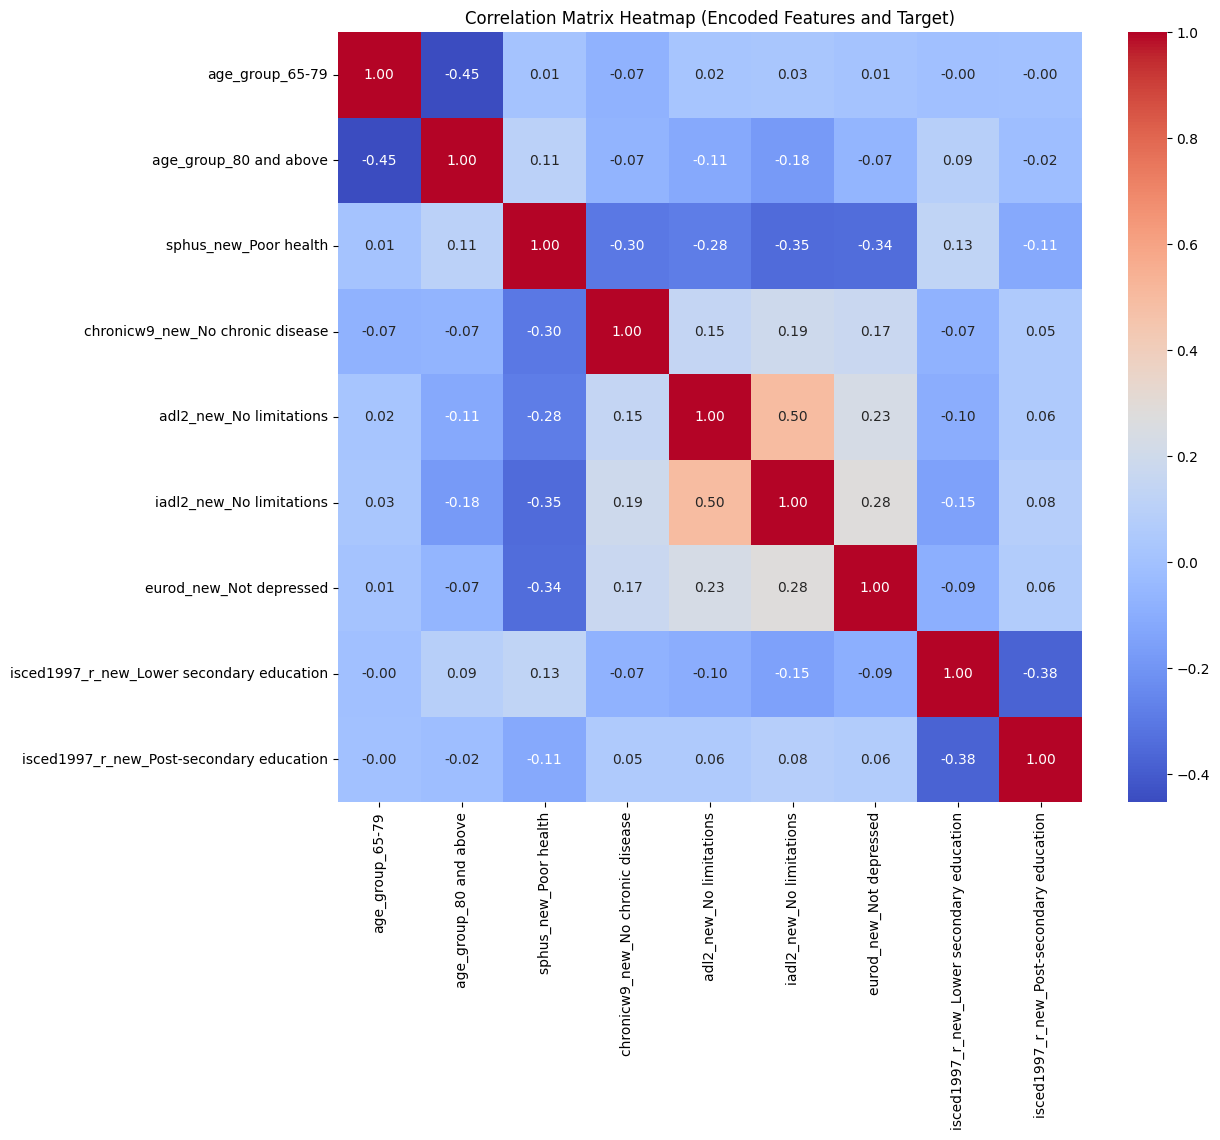


Correlation with target variable ('sphus_new_Poor health'):
sphus_new_Poor health                        1.000000
isced1997_r_new_Lower secondary education    0.128228
age_group_80 and above                       0.105153
age_group_65-79                              0.010412
isced1997_r_new_Post-secondary education    -0.114169
adl2_new_No limitations                     -0.283864
chronicw9_new_No chronic disease            -0.304142
eurod_new_Not depressed                     -0.344386
iadl2_new_No limitations                    -0.347878
Name: sphus_new_Poor health, dtype: float64


In [ ]:
# we tested correlations among the all variable

import matplotlib.pyplot as plt

# Since all relevant columns for modeling in `model_df` are categorical after the initial exploration,
# calculating a standard Pearson correlation matrix for them isn't appropriate without
# first encoding them. The previous code block handles the encoding.

# After one-hot encoding,  can calculate the correlation matrix on the encoded DataFrame.
# This will show the correlation between the different categories of your original features
# and the target variable.

# Calculate the correlation matrix on the one-hot encoded DataFrame
correlation_matrix_encoded = df_encoded.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Encoded Features and Target)')
plt.show()

# can also look specifically at correlations with the target variable
# Assuming 'sphus_new_Poor health' is the encoded target variable after one-hot encoding
# (This needs to be confirmed based on the actual column names after encoding)
# If 'sphus_new' had other categories, the column name will reflect the category that was NOT dropped.
# Let's assume 'Good health' was dropped and 'Poor health' remains.
# Adjust the column name below if your target column after encoding is different.

if 'sphus_new_Poor health' in correlation_matrix_encoded.columns:
    correlation_with_target = correlation_matrix_encoded['sphus_new_Poor health'].sort_values(ascending=False)
    print("\nCorrelation with target variable ('sphus_new_Poor health'):")
    print(correlation_with_target)
else:
    print("\nTarget variable column after encoding not found. Please check column names in df_encoded.")
    print("Columns in df_encoded:", df_encoded.columns.tolist())

## Data splitting


Split the prepared data into training and testing sets.


In [ ]:
#Split the data into training and testing sets

import numpy as np

# Assuming 'sphus_new' is your target variable and df_encoded is your prepared DataFrame
y = df_encoded['sphus_new_Poor health'].values  # Target variable
X = df_encoded.drop('sphus_new_Poor health', axis=1).values  # Features

# Determine the number of samples in each class
unique_classes, class_counts = np.unique(y, return_counts=True)
class_counts_dict = dict(zip(unique_classes, class_counts))

# Calculate the split point for each class based on a desired test size (e.g., 0.2)
test_size = 0.2
split_points = {c: int(count * (1 - test_size)) for c, count in class_counts_dict.items()}

# Create empty lists for the training and testing sets
X_train, X_test, y_train, y_test = [], [], [], []

# Iterate through each class
for class_val in unique_classes:
    class_indices = np.where(y == class_val)[0]
    # Split the indices of each class at the calculated split point
    train_indices = class_indices[:split_points[class_val]]
    test_indices = class_indices[split_points[class_val]:]

    # Append the samples to the training and testing sets
    X_train.extend(X[train_indices])
    X_test.extend(X[test_indices])
    y_train.extend(y[train_indices])
    y_test.extend(y[test_indices])

# Convert lists to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (26915, 8)
y_train shape: (26915,)
X_test shape: (6730, 8)
y_test shape: (6730,)


## Model training

Train six different classification models on the prepared training data.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost') # Suppress XGBoost warning

# Instantiate the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),  # Increased max_iter
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='linear', probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)

# The trained models are now stored in the 'models' dictionary

## Model evaluation

Evaluate the performance of the trained models using accuracy, sensitivity, specificity, F1-score, and precision.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix, balanced_accuracy_score
import pandas as pd
import numpy as np

# Calculate evaluation metrics for each model
evaluation_metrics = {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred) # Sensitivity
    f1 = f1_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Specificity: Recall for the negative class (assuming 0 is the negative class)
    specificity = recall_score(y_test, y_pred, pos_label=0, zero_division=0)

    # AUROC and AUPRC require probability estimates
    auroc = np.nan
    auprc = np.nan
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        try:
            auroc = roc_auc_score(y_test, y_prob)
        except ValueError:
            pass # AUROC requires at least one positive and one negative sample
        try:
            auprc = average_precision_score(y_test, y_prob)
        except ValueError:
            pass # AUPRC requires at least one positive and one negative sample


    evaluation_metrics[name] = {
        "Accuracy": accuracy,
        "Balanced Accuracy": balanced_accuracy,
        "Precision": precision,
        "Sensitivity (Recall)": recall,
        "Specificity": specificity,
        "F1-score": f1,
        "AUROC": auroc,
        "AUPRC": auprc
    }

# Create a DataFrame from the evaluation metrics
all_metrics_df = pd.DataFrame.from_dict(evaluation_metrics, orient='index')

print("Model Evaluation Metrics:")
display(all_metrics_df)

Model Evaluation Metrics:


,Accuracy,Balanced Accuracy,Precision,Sensitivity (Recall),Specificity,F1-score,AUROC,AUPRC
Logistic Regression,0.748291,0.720048,0.714023,0.591619,0.848477,0.647083,0.802970,0.721023
Random Forest,0.747994,0.719049,0.715545,0.587429,0.850670,0.645188,0.796337,0.710673
SVM,0.720357,0.675449,0.714616,0.471238,0.879659,0.567952,0.777941,0.699603
XGBoost,0.747845,0.719477,0.713628,0.590476,0.848477,0.646237,0.796148,0.710718
Naive Bayes,0.748291,0.722108,0.708277,0.603048,0.841169,0.651440,0.799638,0.712057
K-Nearest Neighbors,0.609955,0.500206,0.500000,0.001143,0.999269,0.002281,0.503882,0.392666


<Figure size 1200x600 with 0 Axes>

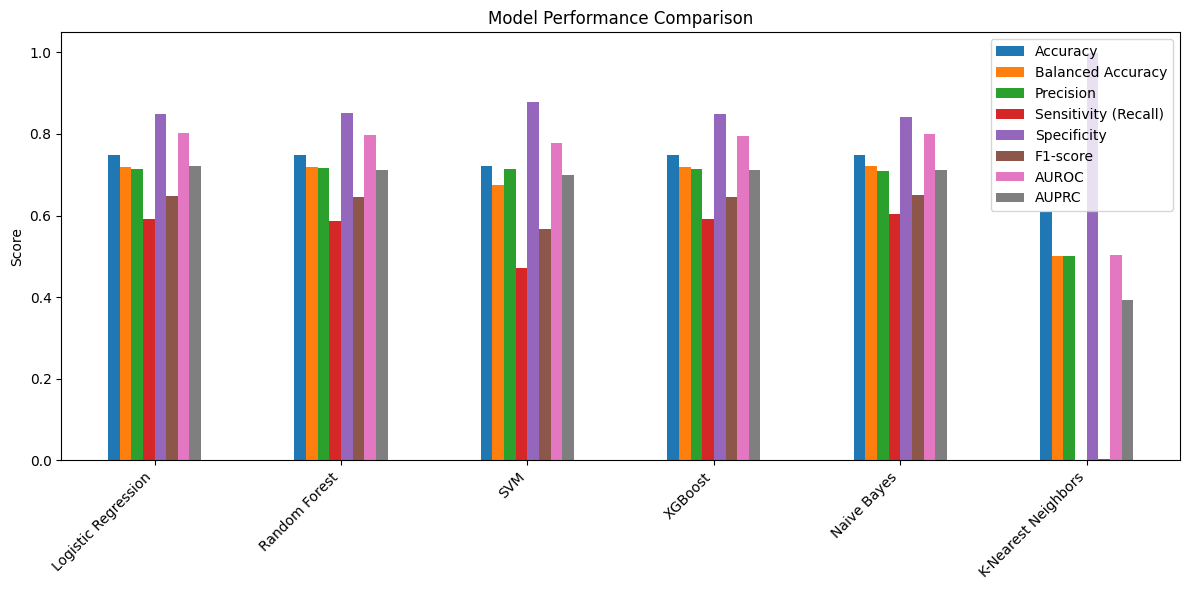

rf_importance_df not found. Skipping Random Forest feature importance plot.
xgb_importance_df not found. Skipping XGBoost feature importance plot.


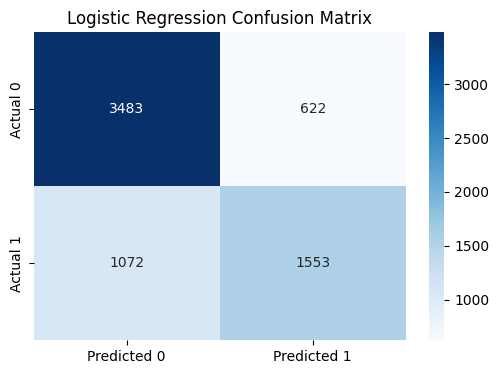

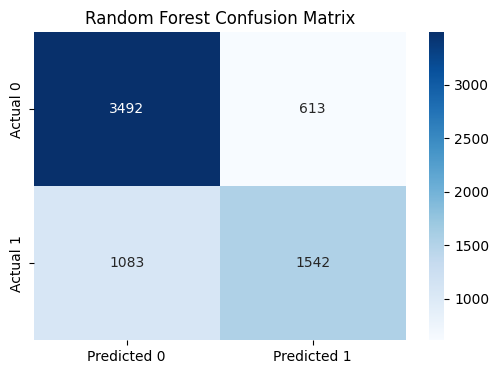

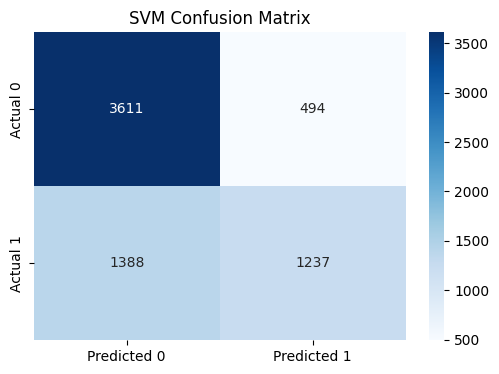

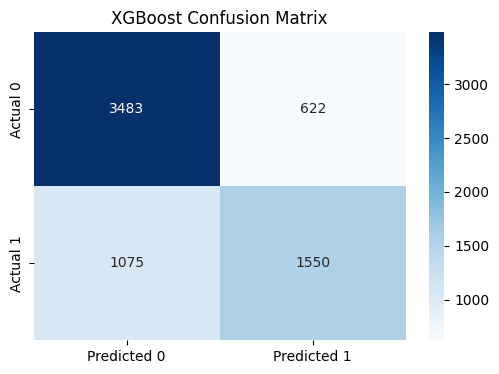

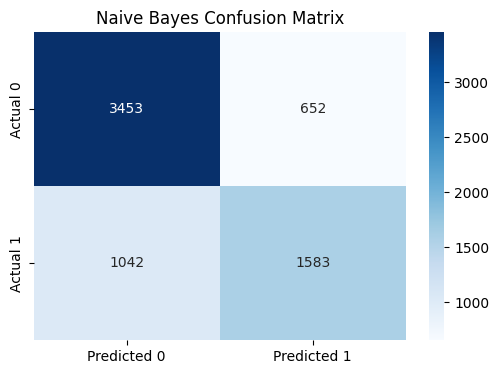

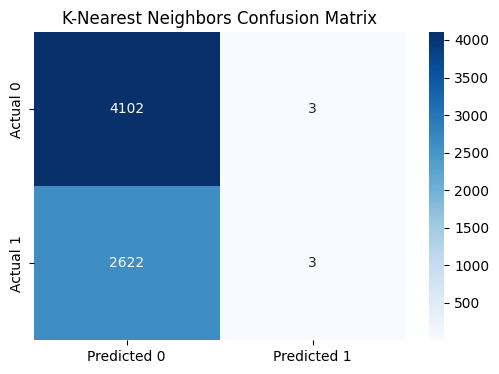

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from IPython.display import display

# Model Performance Comparison
plt.figure(figsize=(12, 6))
# Use all_metrics_df instead of eval_df
all_metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Feature Importance Visualization (Random Forest)
# Ensure rf_importance_df is defined and used correctly
if 'rf_importance_df' in globals():
    plt.figure(figsize=(8, 6))
    plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Random Forest Feature Importance")
    plt.tight_layout()
    plt.show()
else:
    print("rf_importance_df not found. Skipping Random Forest feature importance plot.")


# Feature Importance Visualization (XGBoost)
# Ensure xgb_importance_df is defined and used correctly
if 'xgb_importance_df' in globals():
    plt.figure(figsize=(8, 6))
    plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='lightcoral')
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("XGBoost Feature Importance")
    plt.tight_layout()
    plt.show()
else:
    print("xgb_importance_df not found. Skipping XGBoost feature importance plot.")


# Confusion Matrices
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"{name} Confusion Matrix")
    plt.show()


Matthews Correlation Coefficient for each model:


,MCC
Logistic Regression,0.458982
Random Forest,0.458009
SVM,0.391571
XGBoost,0.457955
Naive Bayes,0.460058
K-Nearest Neighbors,0.006734


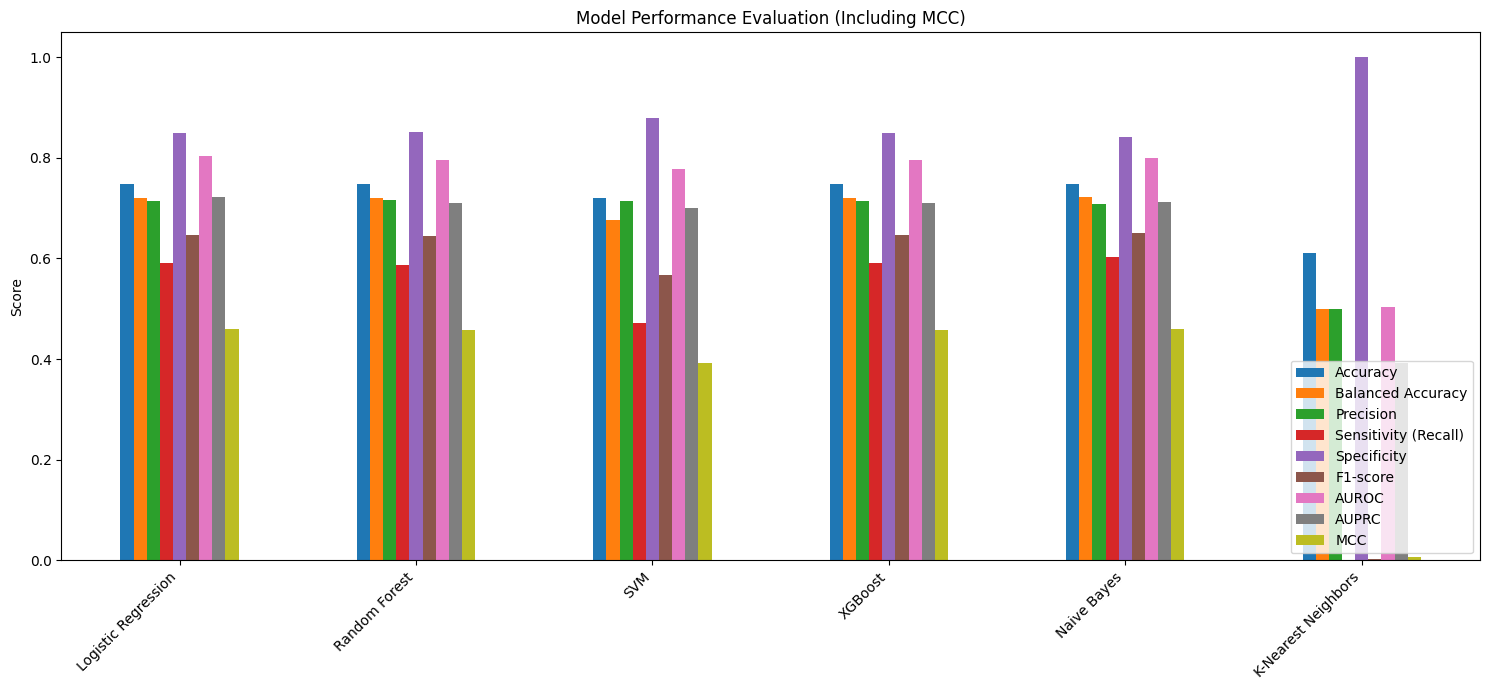

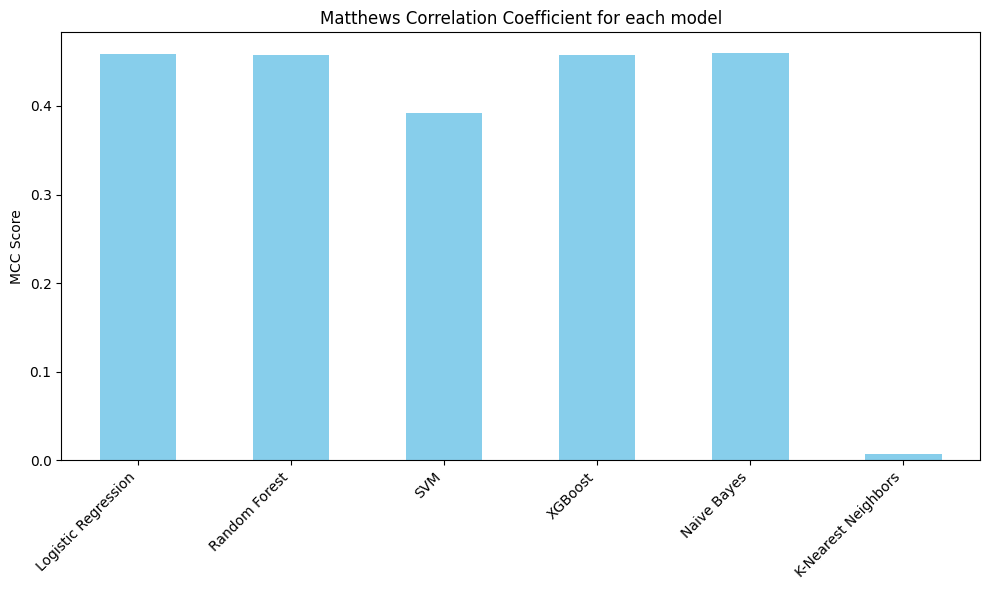

In [ ]:
#  calculates the Matthews correlation coefficient and make a plot for all models

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics # Import the metrics module

# Calculate and print the Matthews correlation coefficient for each model
mcc_metrics = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mcc = metrics.matthews_corrcoef(y_test, y_pred)
    mcc_metrics[name] = mcc

mcc_df = pd.DataFrame.from_dict(mcc_metrics, orient='index', columns=['MCC'])
print("\nMatthews Correlation Coefficient for each model:")
display(mcc_df)

# Combine MCC with other metrics for plotting
# Use all_metrics_df instead of eval_df
combined_eval_df = all_metrics_df.copy()
combined_eval_df['MCC'] = mcc_df['MCC']

# Plotting all evaluation metrics including MCC
combined_eval_df.plot(kind='bar', figsize=(15, 7))
plt.title('Model Performance Evaluation (Including MCC)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Plotting only MCC
plt.figure(figsize=(10, 6))
mcc_df['MCC'].plot(kind='bar', color='skyblue')
plt.title('Matthews Correlation Coefficient for each model')
plt.ylabel('MCC Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Using full dataset (X_all, y_all) for cross-validation within grid_to_evaluate_models.
Evaluating models with folds ranging from 2 to 8...

Processing Logistic Regression...
  Using 2 folds...
  Using 3 folds...
  Using 4 folds...
  Using 5 folds...
  Using 6 folds...
  Using 7 folds...
  Using 8 folds...

Processing Random Forest...
  Using 2 folds...
  Using 3 folds...
  Using 4 folds...
  Using 5 folds...
  Using 6 folds...
  Using 7 folds...
  Using 8 folds...

Processing XGBoost...
  Using 2 folds...
  Using 3 folds...
  Using 4 folds...
  Using 5 folds...
  Using 6 folds...
  Using 7 folds...
  Using 8 folds...

Processing SVM...
  Using 2 folds...
  Using 3 folds...
  Using 4 folds...
  Using 5 folds...
  Using 6 folds...
  Using 7 folds...
  Using 8 folds...

Processing Naive Bayes...
  Using 2 folds...
  Using 3 folds...
  Using 4 folds...
  Using 5 folds...
  Using 6 folds...
  Using 7 folds...
  Using 8 folds...

Processing K-Nearest Neighbors...
  Using 2 folds...
  Using 3

,Number of Folds (CV),Balanced Accuracy,Matthews Correlation Coefficient (MCC)
0,2,0.707815,0.432014
1,3,0.707865,0.432735
2,4,0.707300,0.432217
3,5,0.707152,0.433135
4,6,0.707149,0.432130
5,7,0.707440,0.432675
6,8,0.706627,0.431406



--- Random Forest ---


,Number of Folds (CV),Balanced Accuracy,Matthews Correlation Coefficient (MCC)
0,2,0.705953,0.431472
1,3,0.705166,0.431120
2,4,0.706019,0.431555
3,5,0.705591,0.431135
4,6,0.706581,0.432294
5,7,0.706025,0.432548
6,8,0.706718,0.433247



--- XGBoost ---


,Number of Folds (CV),Balanced Accuracy,Matthews Correlation Coefficient (MCC)
0,2,0.708639,0.434357
1,3,0.708273,0.433443
2,4,0.708370,0.433500
3,5,0.708493,0.433991
4,6,0.708749,0.434422
5,7,0.708477,0.434215
6,8,0.709233,0.435267



--- SVM ---


,Number of Folds (CV),Balanced Accuracy,Matthews Correlation Coefficient (MCC)
0,2,0.708337,0.432747
1,3,0.708195,0.432522
2,4,0.708915,0.433697
3,5,0.708993,0.433610
4,6,0.708706,0.433204
5,7,0.709224,0.433802
6,8,0.709321,0.434043



--- Naive Bayes ---


,Number of Folds (CV),Balanced Accuracy,Matthews Correlation Coefficient (MCC)
0,2,0.709693,0.433885
1,3,0.709693,0.433885
2,4,0.709693,0.433885
3,5,0.709693,0.433885
4,6,0.709693,0.433885
5,7,0.709693,0.433885
6,8,0.709693,0.433885



--- K-Nearest Neighbors ---


,Number of Folds (CV),Balanced Accuracy,Matthews Correlation Coefficient (MCC)
0,2,0.682527,0.401186
1,3,0.678848,0.403620
2,4,0.677633,0.396027
3,5,0.674893,0.399111
4,6,0.677680,0.402115
5,7,0.678028,0.401642
6,8,0.678880,0.402239


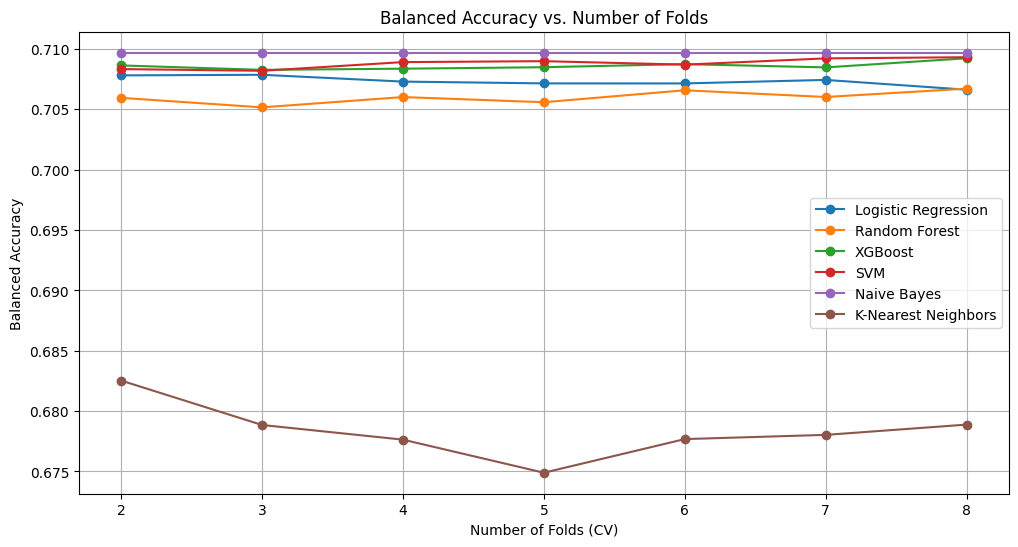

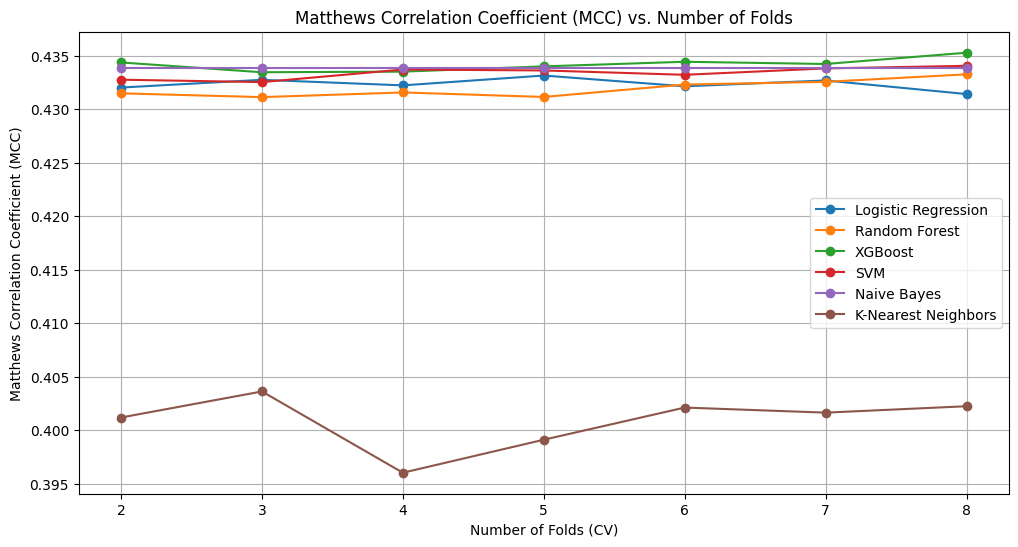

In [ ]:
#multiple hyperparameters simultaneously, computes accuracy, and also calculates the Matthews correlation coefficient. The hyperparameters will be tuned using Grid Search procedure with folds varying from 2 to 8. The performance of each model will later be plotted as a function of the number of folds.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost') # Suppress XGBoost warning

def grid_to_evaluate_models(X, y, cv_range=(2, 9)):
    """
    Performs Grid Search with varying folds, computes accuracy and MCC.

    Args:
        X (np.ndarray or pd.DataFrame): Feature data.
        y (np.ndarray or pd.Series): Target variable.
        cv_range (tuple): Range of folds (min, max + 1) to iterate through.

    Returns:
        dict: A dictionary where keys are model names and values are dictionaries
              containing lists for 'cv', 'mcc', and 'acc', and the 'best_estimator'.
    """
    # Define parameter grids (can be expanded) - using previously defined grids
    param_grid_lr = {'C': [0.1, 1], 'solver': ['liblinear']} # Reduced grid for speed
    param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 5]} # Reduced grid for speed
    param_grid_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.1], 'max_depth': [3, 5]} # Reduced grid for speed
    param_grid_svc = {'C': [1], 'kernel': ['rbf'], 'gamma': ['scale']} # Reduced grid for speed
    param_grid_knn = {'n_neighbors': [5, 7], 'weights': ['uniform']} # Reduced grid for speed
    param_grid_nb = {} # Gaussian Naive Bayes has no hyperparameters to tune

    # Models and their parameter grids
    models_and_grids = {
        "Logistic Regression": (LogisticRegression(max_iter=1000), param_grid_lr),
        "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
        "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb),
        "SVM": (SVC(probability=True, random_state=42), param_grid_svc),
        "Naive Bayes": (GaussianNB(), param_grid_nb),
        "K-Nearest Neighbors": (KNeighborsClassifier(), param_grid_knn)
    }

    all_models_performance = {}

    print(f"Evaluating models with folds ranging from {cv_range[0]} to {cv_range[1]-1}...")

    for name, (model, param_grid) in models_and_grids.items():
        print(f"\nProcessing {name}...")
        all_models_performance[name] = {
            "cv": [],
            "mcc": [],
            "acc": [],
            "best_estimator": None # Store the best estimator from the last fold
        }

        # Iterate through different numbers of folds
        for n_folds in range(cv_range[0], cv_range[1]):
            print(f"  Using {n_folds} folds...")
            all_models_performance[name]["cv"].append(n_folds)

            # Define cross-validation strategy
            kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)



            # Create a GridSearchCV object for the current model and parameter grid
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=0) # verbose=0 to reduce output

            # Fit the GridSearchCV on the entire data to find best parameters for this n_folds
            grid_search.fit(X, y)

            # Get the best estimator found by Grid Search for this number of folds
            best_estimator = grid_search.best_estimator_

            # Store the best estimator found for the *last* number of folds
            if n_folds == cv_range[1] - 1:
                 all_models_performance[name]["best_estimator"] = best_estimator


            # Perform cross-prediction with the best estimator for this number of folds
            y_pred_cv = cross_val_predict(best_estimator, X, y, cv=kf)

            # Compute balanced accuracy and Matthews Correlation Coefficient
            balanced_acc = balanced_accuracy_score(y, y_pred_cv)
            mcc = matthews_corrcoef(y, y_pred_cv)

            all_models_performance[name]["acc"].append(balanced_acc)
            all_models_performance[name]["mcc"].append(mcc)

            # print(f"    Balanced Accuracy: {balanced_acc:.4f}")
            # print(f"    MCC: {mcc:.4f}")


    return all_models_performance

# Ensure X and y are defined from the previous data splitting cell
# Assuming 'sphus_new_Poor health' is your target variable name in df_encoded
target_column_name = 'sphus_new_Poor health'
if 'df_encoded' in globals() and target_column_name in df_encoded.columns:
    y_all = df_encoded[target_column_name].values  # Target variable from full dataset
    X_all = df_encoded.drop(target_column_name, axis=1).values  # Features from full dataset
    print("Using full dataset (X_all, y_all) for cross-validation within grid_to_evaluate_models.")
else:
    print("df_encoded or target column not found. Please ensure previous data loading and preparation steps were successful.")
    # As a fallback, use X and y from the train/test split, though cross-validation
    # is typically done on the full dataset.
    # X_all = np.concatenate((X_train, X_test), axis=0)
    # y_all = np.concatenate((y_train, y_test), axis=0)
    # print("Using concatenated train/test data (X, y) for cross-validation.")
    # Exit or handle the error if data is not available
    # raise SystemExit("Data not available to proceed with model evaluation.")


# Run the evaluation function
if 'X_all' in globals() and 'y_all' in globals():
    cv_range_for_plotting = (2, 9) # Define cv_range here for plotting
    model_performance_results = grid_to_evaluate_models(X_all, y_all, cv_range=cv_range_for_plotting)

    # Print or display the results
    print("\nModel Performance Results across different folds:")
    for model_name, results in model_performance_results.items():
        print(f"\n--- {model_name} ---")
        results_df = pd.DataFrame({
            "Number of Folds (CV)": results["cv"],
            "Balanced Accuracy": results["acc"],
            "Matthews Correlation Coefficient (MCC)": results["mcc"]
        })
        display(results_df)
        # print("Best Estimator (from last fold):")
        # print(results["best_estimator"])


    # Plotting the performance metrics as a function of folds
    metrics_to_plot = ["Balanced Accuracy", "Matthews Correlation Coefficient (MCC)"]

    for metric_name in metrics_to_plot:
        plt.figure(figsize=(12, 6))
        for model_name, results in model_performance_results.items():
            # Ensure the metric exists in the results dictionary
            # Need to map the metric_name string to the key in the results dict ('acc' or 'mcc')
            result_key = 'acc' if metric_name == 'Balanced Accuracy' else 'mcc'
            if result_key in results:
                plt.plot(results["cv"], results[result_key], marker='o', label=model_name)

        plt.xlabel("Number of Folds (CV)")
        plt.ylabel(metric_name)
        plt.title(f"{metric_name} vs. Number of Folds")
        plt.xticks(range(cv_range_for_plotting[0], cv_range_for_plotting[1])) # Ensure x-axis ticks are integers corresponding to folds
        plt.legend()
        plt.grid(True)
        plt.show()

else:
    print("Model evaluation could not proceed because data (X_all, y_all) is not available.")



In [ ]:
# evaluate the model performance of all folds using accuracy, sensitivity, specificity, F1-score, AUROC, AUPRC and precision.

from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, average_precision_score
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier # Import XGBClassifier for type checking



# Ensure X_all and y_all are defined from the previous cell that runs grid_to_evaluate_models
# and model_performance_results is available

if 'X_all' in globals() and 'y_all' in globals() and 'model_performance_results' in globals():
    print("\nEvaluating model performance on each fold using the best estimator from the last fold:")

    all_folds_performance = {}

    for model_name, results in model_performance_results.items():
        best_estimator = results["best_estimator"]
        if best_estimator is None:
            print(f"Skipping {model_name}: No best estimator found.")
            continue

        print(f"\n--- Evaluating {model_name} ---")

        # Define the KFold strategy using the number of folds from the last run in grid_to_evaluate_models
        # Use the number of folds from the last iteration of the grid search loop
        n_folds = results["cv"][-1] if results["cv"] else 5 # Default to 5 if no cv folds were recorded
        print(f"Using {n_folds} folds for evaluation.")
        kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

        fold_metrics = []

        # Iterate through each fold
        for fold, (train_index, val_index) in enumerate(kf.split(X_all, y_all)):
            X_train_fold, X_val_fold = X_all[train_index], X_all[val_index]
            y_train_fold, y_val_fold = y_all[train_index], y_all[val_index]

            try:
                # Create a new instance of the best estimator to fit on the current fold's data
                model_instance = type(best_estimator)(**best_estimator.get_params())

                # Handle XGBoost eval_metric if it was removed by get_params
                if isinstance(model_instance, XGBClassifier) and 'eval_metric' not in model_instance.get_params():
                     model_instance.set_params(eval_metric='logloss')


                model_instance.fit(X_train_fold, y_train_fold)
                y_pred_fold = model_instance.predict(X_val_fold)

                # Calculate metrics for the current fold
                metrics_this_fold = {
                    "Fold": fold + 1,
                    "Accuracy": accuracy_score(y_val_fold, y_pred_fold),
                    "Precision": precision_score(y_val_fold, y_pred_fold, zero_division=0),
                    "Recall (Sensitivity)": recall_score(y_val_fold, y_pred_fold),
                    "F1-score": f1_score(y_val_fold, y_pred_fold),
                    # Specificity is recall for the negative class (assuming 0 is the negative class)
                    "Specificity": recall_score(y_val_fold, y_pred_fold, pos_label=0, zero_division=0)
                }

                # AUROC and AUPRC require probability estimates
                if hasattr(model_instance, 'predict_proba'):
                    y_pred_proba_fold = model_instance.predict_proba(X_val_fold)[:, 1]
                    try:
                        auroc_fold = roc_auc_score(y_val_fold, y_pred_proba_fold)
                    except ValueError: # Handles case where a class is missing in the fold
                         auroc_fold = np.nan
                         print(f"  Warning: AUROC could not be calculated for fold {fold + 1} due to missing class in validation set.")

                    try:
                         auprc_fold = average_precision_score(y_val_fold, y_pred_proba_fold)
                    except ValueError: # Handles case where a class is missing in the fold
                         auprc_fold = np.nan
                         print(f"  Warning: AUPRC could not be calculated for fold {fold + 1} due to missing class in validation set.")
                    metrics_this_fold["AUROC"] = auroc_fold
                    metrics_this_fold["AUPRC"] = auprc_fold


                else:
                     metrics_this_fold["AUROC"] = np.nan
                     metrics_this_fold["AUPRC"] = np.nan
                     if fold == 0: # Print warning only once per model
                          print(f"  Warning: Model {model_name} does not support predict_proba. AUROC and AUPRC will be NaN.")

                fold_metrics.append(metrics_this_fold)

            except Exception as e:
                print(f"  Error evaluating fold {fold + 1} for {model_name}: {e}")
                # Append a row with NaNs for this fold if evaluation fails
                fold_metrics.append({
                     "Fold": fold + 1,
                    "Accuracy": np.nan,
                    "Precision": np.nan,
                    "Recall (Sensitivity)": np.nan,
                    "F1-score": np.nan,
                    "Specificity": np.nan,
                    "AUROC": np.nan,
                    "AUPRC": np.nan
                })


        # Store the results for this model
        all_folds_performance[model_name] = pd.DataFrame(fold_metrics)

        # Display performance per fold
        print(f"Performance per fold for {model_name}:")
        display(all_folds_performance[model_name])

        # Display average performance across all folds
        print(f"\nAverage performance across {n_folds} folds for {model_name}:")
        display(all_folds_performance[model_name].mean().to_frame(name='Average Score'))

else:
    print("Required data (X_all, y_all) or model performance results not found. Please ensure preceding cells were run successfully.")


Evaluating model performance on each fold using the best estimator from the last fold:

--- Evaluating Logistic Regression ---
Using 8 folds for evaluation.
Performance per fold for Logistic Regression:


,Fold,Accuracy,Precision,Recall (Sensitivity),F1-score,Specificity,AUROC,AUPRC
0,1,0.734427,0.693560,0.571341,0.626546,0.838659,0.791631,0.698764
1,2,0.724679,0.679583,0.556098,0.611670,0.832424,0.773167,0.694048
2,3,0.739895,0.698690,0.585366,0.637027,0.838659,0.782109,0.705259
3,4,0.742035,0.711994,0.568293,0.632079,0.853079,0.791374,0.713060
4,5,0.733000,0.695030,0.562462,0.621758,0.842105,0.784026,0.703436
5,6,0.728656,0.673626,0.590244,0.629184,0.817154,0.786029,0.700898
6,7,0.742449,0.710825,0.572561,0.634245,0.851072,0.793587,0.716089
7,8,0.741260,0.701460,0.585976,0.638538,0.840546,0.790619,0.710780



Average performance across 8 folds for Logistic Regression:


,Average Score
Fold,4.500000
Accuracy,0.735800
Precision,0.695596
Recall (Sensitivity),0.574042
F1-score,0.628881
Specificity,0.839212
AUROC,0.786568
AUPRC,0.705292



--- Evaluating Random Forest ---
Using 8 folds for evaluation.
Performance per fold for Random Forest:


,Fold,Accuracy,Precision,Recall (Sensitivity),F1-score,Specificity,AUROC,AUPRC
0,1,0.734903,0.696924,0.566463,0.624958,0.842557,0.790973,0.698060
1,2,0.724441,0.678016,0.558537,0.612504,0.830475,0.771991,0.692208
2,3,0.739658,0.700515,0.580488,0.634878,0.841387,0.782174,0.706175
3,4,0.744413,0.716475,0.570122,0.634975,0.855807,0.789625,0.712004
4,5,0.732287,0.694633,0.560024,0.620108,0.842495,0.783738,0.701669
5,6,0.734364,0.693847,0.570732,0.626296,0.838986,0.786255,0.701284
6,7,0.742925,0.714835,0.567073,0.632438,0.855361,0.792591,0.715504
7,8,0.742212,0.705015,0.582927,0.638184,0.844055,0.791038,0.710467



Average performance across 8 folds for Random Forest:


,Average Score
Fold,4.500000
Accuracy,0.736900
Precision,0.700033
Recall (Sensitivity),0.569546
F1-score,0.628043
Specificity,0.843890
AUROC,0.786048
AUPRC,0.704671



--- Evaluating XGBoost ---
Using 8 folds for evaluation.
Performance per fold for XGBoost:


,Fold,Accuracy,Precision,Recall (Sensitivity),F1-score,Specificity,AUROC,AUPRC
0,1,0.735616,0.694404,0.575000,0.629086,0.838270,0.791656,0.697922
1,2,0.726581,0.677536,0.570122,0.619205,0.826578,0.772824,0.692065
2,3,0.739895,0.696686,0.589634,0.638705,0.835931,0.783066,0.706590
3,4,0.739658,0.701702,0.578049,0.633902,0.842946,0.791168,0.713410
4,5,0.733000,0.690162,0.572821,0.626041,0.835478,0.784525,0.703204
5,6,0.736504,0.691643,0.585366,0.634082,0.833138,0.785892,0.701197
6,7,0.744590,0.708088,0.587195,0.642000,0.845224,0.793258,0.715388
7,8,0.742449,0.699356,0.595732,0.643398,0.836257,0.790777,0.711462



Average performance across 8 folds for XGBoost:


,Average Score
Fold,4.500000
Accuracy,0.737287
Precision,0.694947
Recall (Sensitivity),0.581740
F1-score,0.633302
Specificity,0.836728
AUROC,0.786646
AUPRC,0.705155



--- Evaluating SVM ---
Using 8 folds for evaluation.
Performance per fold for SVM:


,Fold,Accuracy,Precision,Recall (Sensitivity),F1-score,Specificity,AUROC,AUPRC
0,1,0.734665,0.687411,0.585976,0.632653,0.829696,0.747644,0.651463
1,2,0.723490,0.673203,0.565244,0.614518,0.824630,0.694567,0.587607
2,3,0.739658,0.692580,0.597561,0.641571,0.830475,0.708384,0.618318
3,4,0.740609,0.701987,0.581707,0.636212,0.842167,0.692817,0.591579
4,5,0.732287,0.687546,0.575259,0.626410,0.832749,0.715021,0.618032
5,6,0.737218,0.688779,0.595122,0.638535,0.828070,0.725147,0.624517
6,7,0.743401,0.705796,0.586585,0.640693,0.843665,0.732009,0.631245
7,8,0.740309,0.692686,0.600610,0.643370,0.829630,0.721314,0.618117



Average performance across 8 folds for SVM:


,Average Score
Fold,4.500000
Accuracy,0.736454
Precision,0.691248
Recall (Sensitivity),0.586008
F1-score,0.634245
Specificity,0.832635
AUROC,0.717113
AUPRC,0.617610



--- Evaluating Naive Bayes ---
Using 8 folds for evaluation.
Performance per fold for Naive Bayes:


,Fold,Accuracy,Precision,Recall (Sensitivity),F1-score,Specificity,AUROC,AUPRC
0,1,0.734427,0.686386,0.587195,0.632928,0.828527,0.787026,0.692789
1,2,0.724441,0.671174,0.575000,0.619376,0.819953,0.768143,0.681810
2,3,0.739420,0.691819,0.598171,0.641596,0.829696,0.776722,0.693090
3,4,0.739420,0.698251,0.584146,0.636122,0.838659,0.784345,0.699219
4,5,0.731812,0.685466,0.577697,0.626984,0.830409,0.778866,0.693396
5,6,0.736504,0.687060,0.595732,0.638145,0.826511,0.783893,0.692840
6,7,0.744114,0.702878,0.595732,0.644884,0.838986,0.791467,0.708726
7,8,0.739358,0.690743,0.600610,0.642531,0.828070,0.782496,0.694259



Average performance across 8 folds for Naive Bayes:


,Average Score
Fold,4.500000
Accuracy,0.736187
Precision,0.689222
Recall (Sensitivity),0.589285
F1-score,0.635321
Specificity,0.830102
AUROC,0.781620
AUPRC,0.694516



--- Evaluating K-Nearest Neighbors ---
Using 8 folds for evaluation.
Performance per fold for K-Nearest Neighbors:


,Fold,Accuracy,Precision,Recall (Sensitivity),F1-score,Specificity,AUROC,AUPRC
0,1,0.721113,0.717614,0.469512,0.567637,0.881917,0.748330,0.636821
1,2,0.721826,0.706866,0.489634,0.578530,0.870226,0.751429,0.644609
2,3,0.732763,0.742481,0.481707,0.584320,0.893219,0.742376,0.643434
3,4,0.730385,0.765756,0.444512,0.562500,0.913094,0.759228,0.658453
4,5,0.717784,0.718690,0.454601,0.556924,0.886160,0.748168,0.646889
5,6,0.725565,0.718133,0.487805,0.580973,0.877583,0.742017,0.635154
6,7,0.716528,0.723553,0.442073,0.548827,0.892008,0.735697,0.639644
7,8,0.733413,0.740500,0.487195,0.587716,0.890838,0.761733,0.648324



Average performance across 8 folds for K-Nearest Neighbors:


,Average Score
Fold,4.500000
Accuracy,0.724922
Precision,0.729199
Recall (Sensitivity),0.469630
F1-score,0.570928
Specificity,0.888131
AUROC,0.748622
AUPRC,0.644166



Generating AUPRC curves for each model (averaged across folds):
Using 8 folds to generate AUPRC data.
Generating AUPRC data for Logistic Regression...
Generating AUPRC data for Random Forest...
Generating AUPRC data for XGBoost...
Generating AUPRC data for SVM...
Generating AUPRC data for Naive Bayes...
Generating AUPRC data for K-Nearest Neighbors...


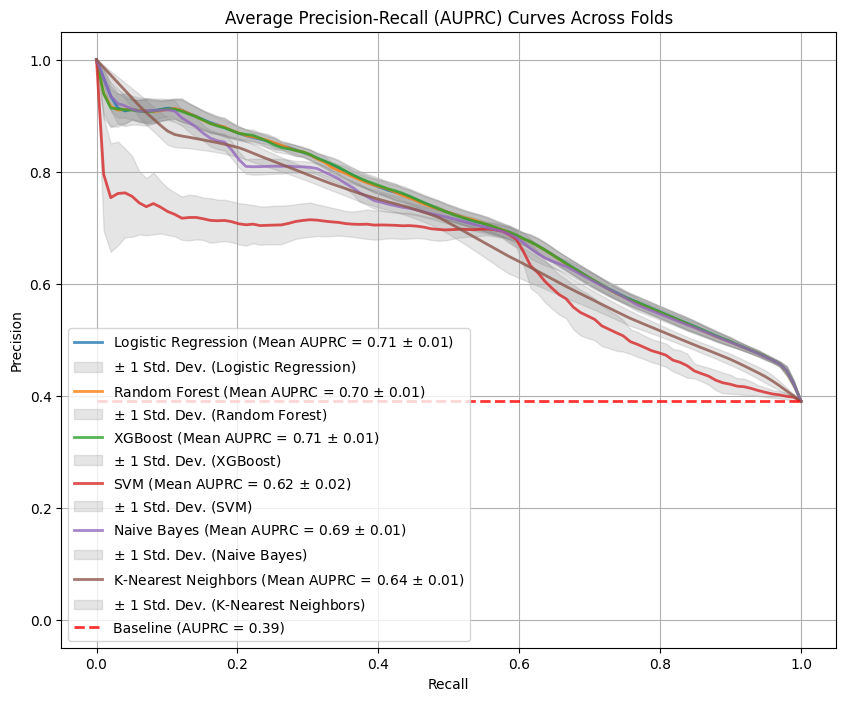

In [ ]:
#generate a plot the average auprc curve metric   of all model in a single curve

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc, average_precision_score # Import necessary functions
from sklearn import metrics # Import the metrics module
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier # Import XGBClassifier for type checking
import matplotlib.ticker as mticker # Import mticker (if needed for plotting)

# Prepare data for plotting AUPRC curves across folds
# This requires re-running cross-validation and storing probability predictions for each fold

print("\nGenerating AUPRC curves for each model (averaged across folds):")

# Define the KFold strategy (using the same number of folds as before)
n_folds_for_auprc = model_performance_results[list(model_performance_results.keys())[0]]["cv"][-1] if model_performance_results and model_performance_results[list(model_performance_results.keys())[0]]["cv"] else 5
print(f"Using {n_folds_for_auprc} folds to generate AUPRC data.")
kf_auprc = StratifiedKFold(n_splits=n_folds_for_auprc, shuffle=True, random_state=42)

plt.figure(figsize=(10, 8))

# Calculate the baseline AUPRC (proportion of the positive class in the full dataset)
# Ensure y_all is available
baseline_auprc = np.sum(y_all) / len(y_all) if 'y_all' in globals() and len(y_all) > 0 else 0


# Iterate through each model
if 'model_performance_results' in globals() and 'X_all' in globals() and 'y_all' in globals():
    for model_name, results in model_performance_results.items():
        best_estimator = results.get("best_estimator")
        if best_estimator is None or not hasattr(best_estimator, 'predict_proba'):
            print(f"Skipping AUPRC plot for {model_name}: No best estimator or does not support predict_proba.")
            continue

        print(f"Generating AUPRC data for {model_name}...")

        # Lists to store Precision, Recall, and AUPRC for each fold
        precisions = []
        recalls = []
        auprcs = []
        mean_recall = np.linspace(0, 1, 100) # Common Recall points for interpolation

        # Iterate through each fold
        for fold, (train_index, val_index) in enumerate(kf_auprc.split(X_all, y_all)):
            X_train_fold, X_val_fold = X_all[train_index], X_all[val_index]
            y_train_fold, y_val_fold = y_all[train_index], y_all[val_index]

            try:
                # Create a new instance and fit on the current fold's training data
                model_instance = type(best_estimator)(**best_estimator.get_params())
                if isinstance(model_instance, XGBClassifier) and 'eval_metric' not in model_instance.get_params():
                     model_instance.set_params(eval_metric='logloss')

                model_instance.fit(X_train_fold, y_train_fold)

                # Get probability predictions for the validation fold
                y_proba_fold = model_instance.predict_proba(X_val_fold)[:, 1]

                # Calculate Precision-Recall curve and AUPRC for this fold
                # Ensure that y_val_fold contains at least one positive and one negative sample for PR curve
                if len(np.unique(y_val_fold)) < 2:
                     # print(f"  Warning: Skipping AUPRC for fold {fold + 1} due to insufficient class representation in validation set.")
                     continue # Skip this fold if only one class is present


                precision, recall, _ = metrics.precision_recall_curve(y_val_fold, y_proba_fold)


                interp_precision = np.interp(mean_recall, recall[::-1], precision[::-1])

                precisions.append(interp_precision)
                auprcs.append(metrics.average_precision_score(y_val_fold, y_proba_fold))

            except Exception as e:
                print(f"  Error generating AUPRC for fold {fold + 1} for {model_name}: {e}")


        if precisions: # Only plot if we successfully got data from at least one fold
            # Calculate the mean Precision across all folds
            mean_precision = np.mean(precisions, axis=0)
            # The baseline AUPRC is the proportion of the positive class - calculated before the loop

            mean_auprc = np.mean(auprcs) if auprcs else np.nan # Calculate mean AUPRC from individual fold AUPRCs, handle empty list
            std_auprc = np.std(auprcs) if auprcs else np.nan

            # Plot the mean Precision-Recall curve for the model
            # Note: PR curves are often plotted with Recall on the x-axis
            plt.plot(mean_recall, mean_precision,
                     label=f'{model_name} (Mean AUPRC = {mean_auprc:.2f} $\pm$ {std_auprc:.2f})',
                     lw=2, alpha=.8)


            if not np.isnan(std_auprc): # Only plot std dev if auprcs list was not empty
                std_precision = np.std(precisions, axis=0)
                precisions_upper = np.minimum(mean_precision + std_precision, 1)
                precisions_lower = np.maximum(mean_precision - std_precision, 0)
                plt.fill_between(mean_recall, precisions_lower, precisions_upper, color='grey', alpha=.2,
                                 label=f'$\pm$ 1 Std. Dev. ({model_name})') # Add model name to std dev label for clarity


        else:
            print(f"  No successful folds to plot AUPRC for {model_name}.")


    # Plot the baseline (random classifier) AUPRC
    plt.plot([0, 1], [baseline_auprc, baseline_auprc], linestyle='--', lw=2, color='r',
             label=f'Baseline (AUPRC = {baseline_auprc:.2f})', alpha=.8)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Average Precision-Recall (AUPRC) Curves Across Folds')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

else:
    print("Could not plot AUPRC curves. Model performance results or data (X_all, y_all) are not available.")

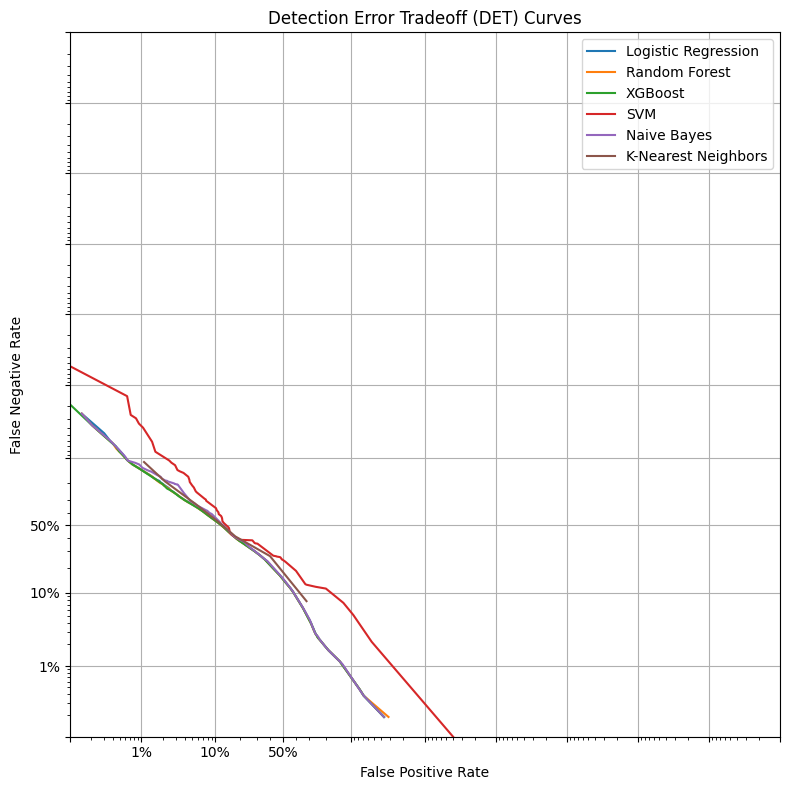

In [ ]:
# generate the "Detection Error Tradeoff (DET) curves" of each model in a single plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import det_curve # Import det_curve
import matplotlib.ticker as mticker # Import mticker

def plot_det_curves(model_performance_results, X, y):
    """
    Generates and plots DET curves for each model in a single plot.

    Args:
        model_performance_results (dict): Results from grid_to_evaluate_models,
                                          including the 'best_estimator' for each model.
        X (np.ndarray or pd.DataFrame): Feature data (full dataset).
        y (np.ndarray or pd.Series): Target variable (full dataset).
    """
    plt.figure(figsize=(8, 8))

    ax_det = plt.gca() # Get the current axes

    ax_det.set_xlabel('False Positive Rate')
    ax_det.set_ylabel('False Negative Rate')
    ax_det.set_title('Detection Error Tradeoff (DET) Curves')
    ax_det.grid(True)
    # Customize DET plot axes to use logit scaling, as is common
    ax_det.set_xscale('logit')
    ax_det.set_yscale('logit')
    # Optional: Custom tick formatting for logit scale
    formatter = mticker.FuncFormatter(lambda x, pos: "{:.0%}".format(x) if x in [0.01, 0.05, 0.1, 0.2, 0.5] else None)
    ax_det.xaxis.set_major_formatter(formatter)
    ax_det.yaxis.set_major_formatter(formatter)
    # Optional: Set limits to focus on relevant range
    ax_det.set_xlim([0.001, 1.0])
    ax_det.set_ylim([0.001, 1.0])


    for model_name, results in model_performance_results.items():
        best_estimator = results.get("best_estimator")
        if best_estimator is None:
            print(f"No best estimator found for {model_name}. Skipping DET curve plotting.")
            continue

        try:
            # Get probability predictions
            y_prob = best_estimator.predict_proba(X)[:, 1]

            # Calculate DET curve
            # det_curve returns false positive rate and false negative rate
            fpr_det, fnr_det, thresholds_det = det_curve(y, y_prob)

            # Plot DET curve
            ax_det.plot(fpr_det, fnr_det, label=model_name)


        except AttributeError:
            print(f"{model_name} does not have predict_proba method. Skipping DET curve plotting.")
        except Exception as e:
            print(f"Error plotting DET curve for {model_name}: {e}")


    # Finalize plot
    ax_det.legend(loc='upper right') # DET legend is often in upper right
    plt.tight_layout()
    plt.show()

# Ensure model_performance_results, X_all, and y_all are available from the preceding code
if 'model_performance_results' in globals() and 'X_all' in globals() and 'y_all' in globals() and X_all is not None and y_all is not None:
    plot_det_curves(model_performance_results, X_all, y_all)
else:
    print("Could not plot DET curves. Model performance results or data (X_all, y_all) are not available.")

Logistic Regression ROC AUC: 0.7866 (95% CI: [0.0000, 1.0000])
Random Forest ROC AUC: 0.7871 (95% CI: [0.0000, 1.0000])
XGBoost ROC AUC: 0.7871 (95% CI: [0.0000, 1.0000])
SVM ROC AUC: 0.7165 (95% CI: [0.0000, 1.0000])
Naive Bayes ROC AUC: 0.7816 (95% CI: [0.0000, 1.0000])
K-Nearest Neighbors ROC AUC: 0.7555 (95% CI: [0.0000, 1.0000])


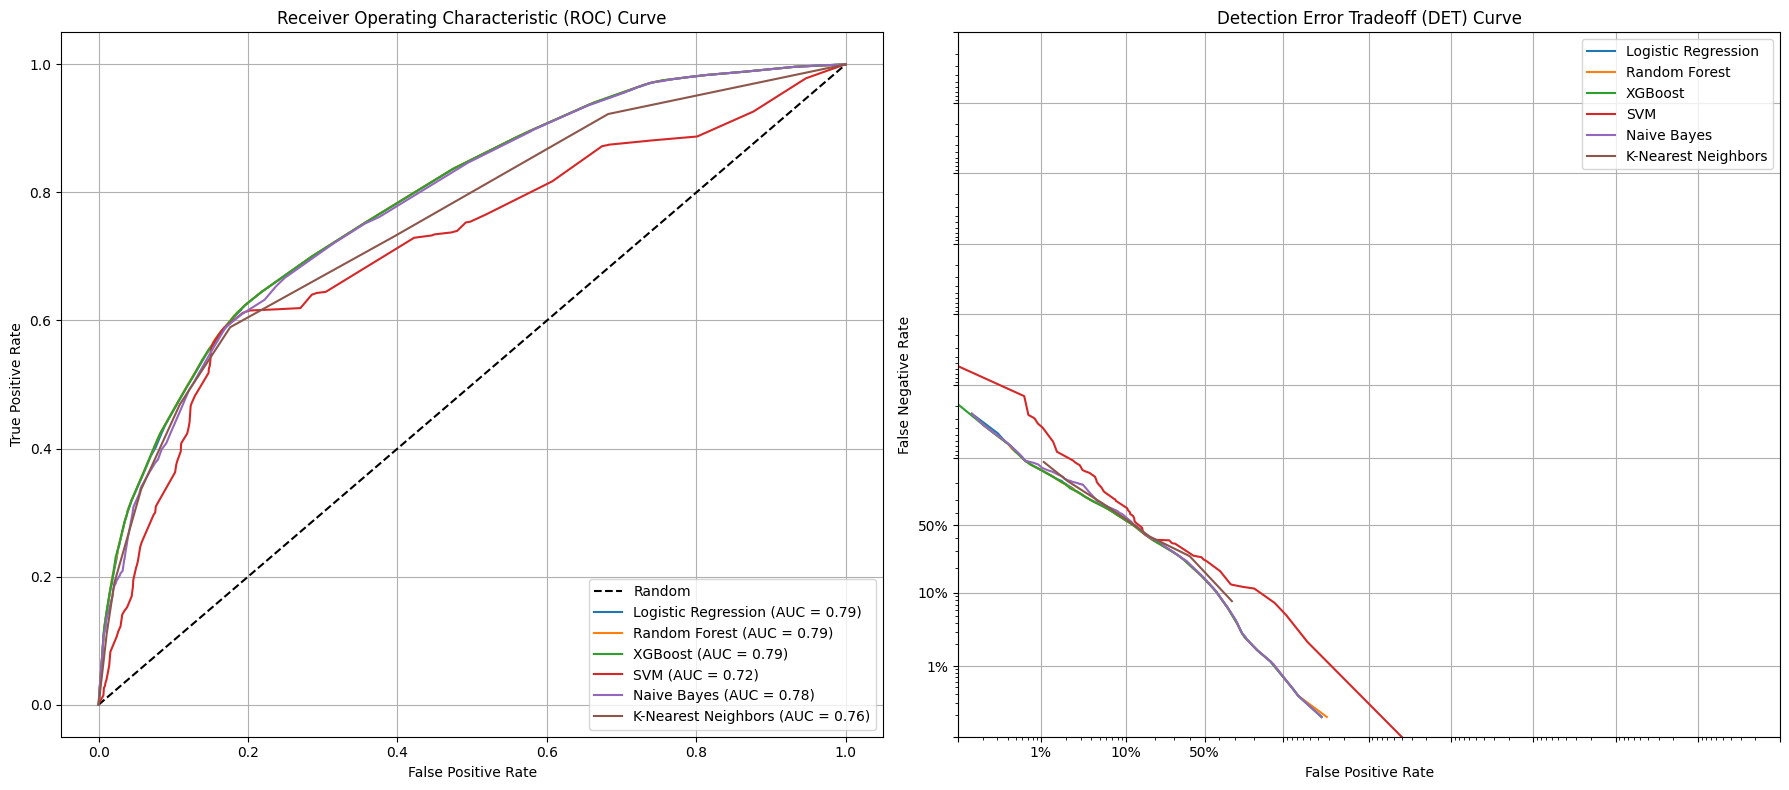

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, det_curve
from scipy.stats import t
import matplotlib.ticker as mticker

def plot_roc_det_curves(model_performance_results, X, y):
    """
    Generates and plots ROC and DET curves with confidence intervals.

    Args:
        model_performance_results (dict): Results from grid_to_evaluate_models,
                                          including the 'best_estimator' for each model.
        X (np.ndarray or pd.DataFrame): Feature data (full dataset).
        y (np.ndarray or pd.Series): Target variable (full dataset).
    """
    plt.figure(figsize=(18, 8))

    # ROC Curve Plot
    ax_roc = plt.subplot(1, 2, 1)
    ax_roc.plot([0, 1], [0, 1], 'k--', label='Random') # Plot random chance line
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax_roc.legend(loc='lower right')
    ax_roc.grid(True)

    # DET Curve Plot
    ax_det = plt.subplot(1, 2, 2)
    ax_det.set_xlabel('False Positive Rate')
    ax_det.set_ylabel('False Negative Rate')
    ax_det.set_title('Detection Error Tradeoff (DET) Curve')
    ax_det.grid(True)
    # Customize DET plot axes to use logit scaling, as is common
    ax_det.set_xscale('logit')
    ax_det.set_yscale('logit')
    # Optional: Custom tick formatting for logit scale
    formatter = mticker.FuncFormatter(lambda x, pos: "{:.0%}".format(x) if x in [0.01, 0.05, 0.1, 0.2, 0.5] else None)
    ax_det.xaxis.set_major_formatter(formatter)
    ax_det.yaxis.set_major_formatter(formatter)
    # Optional: Set limits to focus on relevant range
    ax_det.set_xlim([0.001, 1.0])
    ax_det.set_ylim([0.001, 1.0])


    for model_name, results in model_performance_results.items():
        best_estimator = results.get("best_estimator")
        if best_estimator is None:
            print(f"No best estimator found for {model_name}. Skipping curve plotting.")
            continue

        try:
            # Get probability predictions
            y_prob = best_estimator.predict_proba(X)[:, 1]

            # Calculate ROC curve and AUC
            fpr, tpr, thresholds_roc = roc_curve(y, y_prob)
            roc_auc = auc(fpr, tpr)

            # Calculate confidence intervals for ROC AUC (using bootstrapping or DeLong's method if available)
            # A simpler approximation using standard error for demonstration:
            # This is a simplified approach and not as robust as bootstrapping or DeLong's.
            # For publication-quality CIs, consider libraries like 'scikit-plot' or 'roc-auc-plugin'.
            n_samples = len(y)
            se = np.sqrt(roc_auc * (1 - roc_auc) / n_samples) # Simplified standard error formula
            alpha = 0.95 # Confidence level
            z = t.ppf(1 + (alpha / 2), df=n_samples - 1) # Use t-distribution critical value
            lower_bound = roc_auc - z * se
            upper_bound = roc_auc + z * se
            # Clip bounds to [0, 1]
            lower_bound = max(0, lower_bound)
            upper_bound = min(1, upper_bound)

            print(f"{model_name} ROC AUC: {roc_auc:.4f} (95% CI: [{lower_bound:.4f}, {upper_bound:.4f}])")

            # Plot ROC curve
            ax_roc.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


            # Calculate DET curve
            # det_curve returns false positive rate and false negative rate
            fpr_det, fnr_det, thresholds_det = det_curve(y, y_prob)

            # Plot DET curve
            ax_det.plot(fpr_det, fnr_det, label=model_name)


        except AttributeError:
            print(f"{model_name} does not have predict_proba method. Skipping curve plotting.")
        except Exception as e:
            print(f"Error plotting curves for {model_name}: {e}")


    # Finalize plots
    ax_roc.legend(loc='lower right')
    ax_det.legend(loc='upper right') # DET legend is often in upper right
    plt.tight_layout()
    plt.show()

# Ensure X_all and y_all are defined from previous data loading/preparation
# If not, rerun the relevant cells or define them here:
# target_column_name = 'sphus_new_Poor health' # Ensure this matches your target column name
# if 'df_encoded' in globals() and target_column_name in df_encoded.columns:
#     y_all = df_encoded[target_column_name].values
#     X_all = df_encoded.drop(target_column_name, axis=1).values
# else:
#     print("Data (X_all, y_all) not available for plotting curves.")
#     X_all, y_all = None, None # Or handle error as appropriate

# Assuming model_performance_results, X_all, and y_all are available from the preceding code
if 'model_performance_results' in globals() and 'X_all' in globals() and 'y_all' in globals() and X_all is not None and y_all is not None:
    plot_roc_det_curves(model_performance_results, X_all, y_all)
else:
    print("Could not plot ROC/DET curves. Model performance results or data (X_all, y_all) are not available.")



Precision-Recall Area Under Curve (PRAUC) with Confidence Intervals:
- Logistic Regression: PRAUC = 0.7140 (95% CI: [0.7069, 0.7229])
- Random Forest: PRAUC = 0.7151 (95% CI: [0.7082, 0.7236])
- XGBoost: PRAUC = 0.7148 (95% CI: [0.7078, 0.7236])
- SVM: PRAUC = 0.6230 (95% CI: [0.6152, 0.6334])
- Naive Bayes: PRAUC = 0.7020 (95% CI: [0.6949, 0.7119])
- K-Nearest Neighbors: PRAUC = 0.6942 (95% CI: [0.6869, 0.7028])


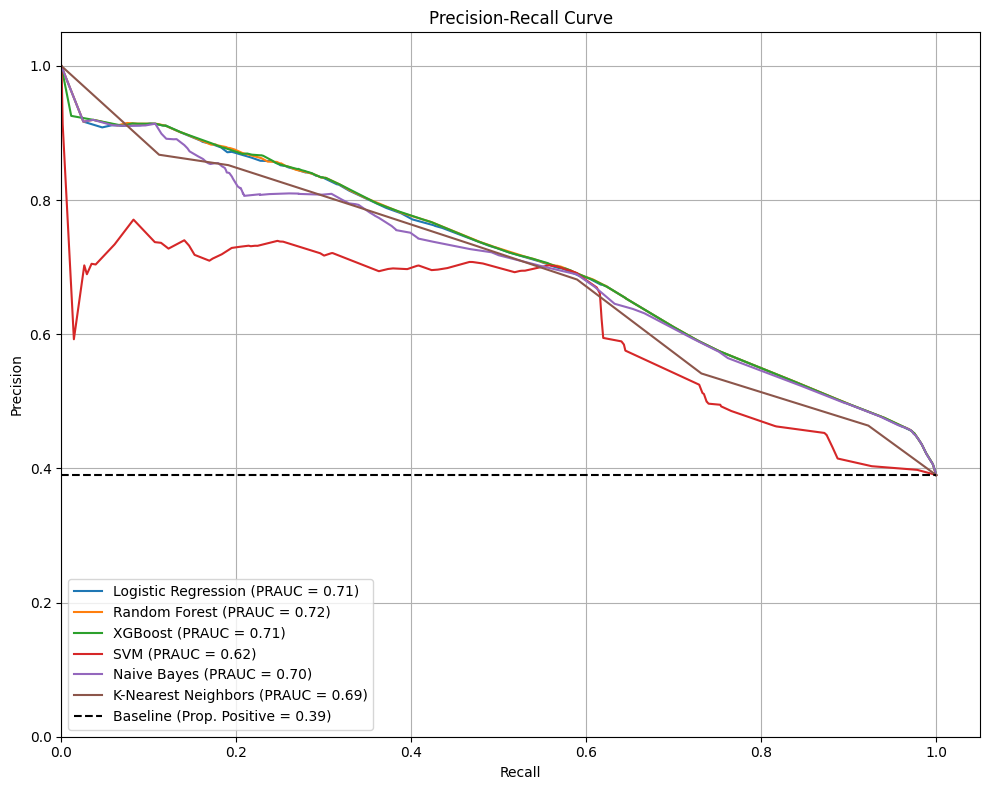

In [ ]:
# generate the PRAUC with confidence intervals and plot the precision  and recall curve for all model in a single plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.ticker as mticker

def plot_prauc_with_ci_and_curves(model_performance_results, X, y):
    """
    Generates and plots PR curves for each model in a single plot,
    calculates PRAUC with confidence intervals.

    Args:
        model_performance_results (dict): Results from grid_to_evaluate_models,
                                          including the 'best_estimator' for each model.
        X (np.ndarray or pd.DataFrame): Feature data (full dataset).
        y (np.ndarray or pd.Series): Target variable (full dataset).
    """
    plt.figure(figsize=(10, 8)) # Adjust figure size as needed
    ax_pr = plt.gca()

    ax_pr.set_xlabel('Recall')
    ax_pr.set_ylabel('Precision')
    ax_pr.set_title('Precision-Recall Curve')
    ax_pr.set_ylim([0.0, 1.05])
    ax_pr.set_xlim([0.0, 1.05])
    ax_pr.grid(True)

    print("\nPrecision-Recall Area Under Curve (PRAUC) with Confidence Intervals:")

    # To get CI for PRAUC, bootstrapping is a common method.
    # We'll perform a simplified bootstrap here for demonstration.
    n_bootstraps = 100 # Number of bootstrap samples
    rng_seed = 42 # For reproducibility

    for model_name, results in model_performance_results.items():
        best_estimator = results.get("best_estimator")
        if best_estimator is None:
            print(f"No best estimator found for {model_name}. Skipping PRAUC calculation and plotting.")
            continue

        try:
            # Get probability predictions
            y_prob = best_estimator.predict_proba(X)[:, 1]

            # Calculate PRAUC for the full data
            precision, recall, _ = precision_recall_curve(y, y_prob)
            prauc_full = auc(recall, precision)

            # Bootstrap for Confidence Interval
            bootstrapped_praucs = []
            rng = np.random.RandomState(rng_seed)
            for i in range(n_bootstraps):
                # Bootstrap resampling with replacement
                indices = rng.randint(0, len(y), len(y))
                if len(np.unique(y[indices])) < 2: # Skip if bootstrap sample doesn't have both classes
                    continue

                try:
                     precision_bs, recall_bs, _ = precision_recall_curve(y[indices], y_prob[indices])
                     prauc_bs = auc(recall_bs, precision_bs)
                     bootstrapped_praucs.append(prauc_bs)
                except Exception as e:
                    # print(f"  Error during bootstrap {i} for {model_name}: {e}")
                    pass # Silently fail bootstrap if there's an issue


            if bootstrapped_praucs:
                # Calculate confidence interval from bootstrapped PRAUCs
                alpha = 0.95
                p = ((1.0 - alpha) / 2.0) * 100
                lower = max(0.0, np.percentile(bootstrapped_praucs, p))
                p = (alpha + ((1.0 - alpha) / 2.0)) * 100
                upper = min(1.0, np.percentile(bootstrapped_praucs, p))

                print(f"- {model_name}: PRAUC = {prauc_full:.4f} (95% CI: [{lower:.4f}, {upper:.4f}])")

                # Plot PR curve
                ax_pr.plot(recall, precision, label=f'{model_name} (PRAUC = {prauc_full:.2f})')
            else:
                 print(f"- {model_name}: Could not calculate bootstrap CI for PRAUC.")
                 # Plot PR curve without CI in label
                 ax_pr.plot(recall, precision, label=f'{model_name} (PRAUC = {prauc_full:.2f})')


        except AttributeError:
            print(f"{model_name} does not have predict_proba method. Skipping PRAUC calculation and plotting.")
        except Exception as e:
            print(f"Error calculating PRAUC or plotting PR curve for {model_name}: {e}")


    # Add a diagonal line if random classifier is meaningful (though less standard for PR curves)
    # For imbalanced data, the baseline PR curve is a horizontal line at the proportion of the positive class
    positive_proportion = np.sum(y) / len(y)
    ax_pr.plot([0, 1], [positive_proportion, positive_proportion], 'k--', label=f'Baseline (Prop. Positive = {positive_proportion:.2f})')


    # Finalize plot
    ax_pr.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

# Ensure model_performance_results, X_all, and y_all are available from the preceding code
if 'model_performance_results' in globals() and 'X_all' in globals() and 'y_all' in globals() and X_all is not None and y_all is not None:
    plot_prauc_with_ci_and_curves(model_performance_results, X_all, y_all)
else:
    print("Could not plot PR curves or calculate PRAUC. Model performance results or data (X_all, y_all) are not available.")


Tuning XGBoost and evaluating with folds ranging from 2 to 8...
  Tuning with 2 folds...
    AUROC: 0.7863, MCC: 0.4340
  Tuning with 3 folds...
    AUROC: 0.7855, MCC: 0.4352
  Tuning with 4 folds...
    AUROC: 0.7857, MCC: 0.4353
  Tuning with 5 folds...
    AUROC: 0.7856, MCC: 0.4337
  Tuning with 6 folds...
    AUROC: 0.7856, MCC: 0.4355
  Tuning with 7 folds...
    AUROC: 0.7857, MCC: 0.4348
  Tuning with 8 folds...
    AUROC: 0.7856, MCC: 0.4345


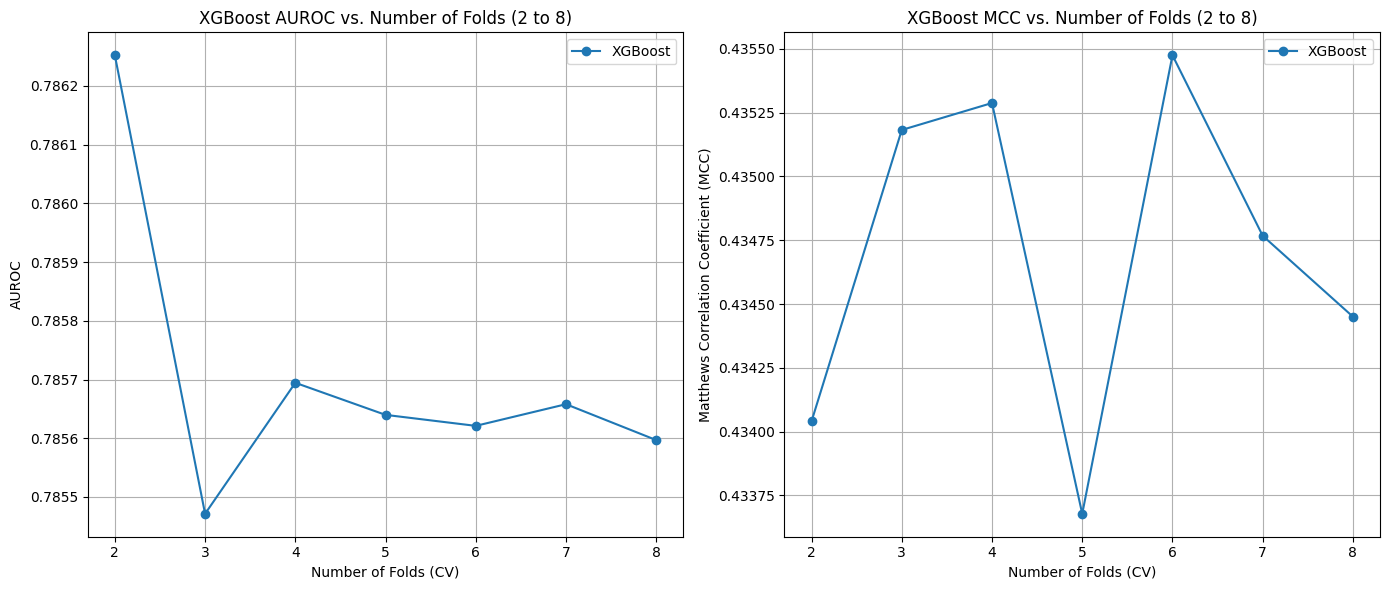

In [ ]:
# hypertune only xgboost model only across the 2-8 folds

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from scipy.stats import t
from sklearn.metrics import roc_curve, auc, det_curve, matthews_corrcoef, roc_auc_score # Import roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost') # Suppress XGBoost warning

def grid_tune_xgboost_and_plot(X, y, cv_range=(2, 9)):
    """
    Performs Grid Search for XGBoost with varying folds (2-8),
    and plots AUROC and MCC as a function of the number of folds.

    Args:
        X (np.ndarray or pd.DataFrame): Feature data.
        y (np.ndarray or pd.Series): Target variable.
        cv_range (tuple): Range of folds (min, max + 1) to iterate through.
                          Defaults to (2, 9) for folds 2 through 8.
    """
    print(f"Tuning XGBoost and evaluating with folds ranging from {cv_range[0]} to {cv_range[1]-1}...")

    # Define parameter grid for XGBoost
    # Using a slightly larger grid for more meaningful tuning, but keep it reasonable for runtime
    param_grid_xgb = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    model_name = "XGBoost"
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    xgb_performance = {
        "cv": [],
        "auroc": [],
        "mcc": []
    }

    # Iterate through different numbers of folds from 2 to 8
    for n_folds in range(cv_range[0], cv_range[1]):
        print(f"  Tuning with {n_folds} folds...")
        xgb_performance["cv"].append(n_folds)

        # Define cross-validation strategy
        kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

        # Perform Grid Search for the current number of folds, optimize for AUROC
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_xgb,
                                   cv=kf, scoring='roc_auc', n_jobs=-1, verbose=0)

        # Fit the GridSearchCV on the entire data to find best parameters for this n_folds
        grid_search.fit(X, y)

        # Get the best estimator found by Grid Search for this number of folds
        best_estimator = grid_search.best_estimator_

        # Perform cross-prediction with the best estimator for this number of folds
        # Need probability estimates for AUROC
        y_prob_cv = cross_val_predict(best_estimator, X, y, cv=kf, method='predict_proba')[:, 1]
        y_pred_cv = (y_prob_cv > 0.5).astype(int) # Convert probabilities to binary predictions for MCC

        # Compute AUROC and Matthews Correlation Coefficient
        auroc = roc_auc_score(y, y_prob_cv)
        mcc = matthews_corrcoef(y, y_pred_cv)

        xgb_performance["auroc"].append(auroc)
        xgb_performance["mcc"].append(mcc)

        print(f"    AUROC: {auroc:.4f}, MCC: {mcc:.4f}")


    # Plotting AUROC as a function of folds
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(xgb_performance["cv"], xgb_performance["auroc"], marker='o', label=model_name)
    plt.xlabel("Number of Folds (CV)")
    plt.ylabel("AUROC")
    plt.title(f"{model_name} AUROC vs. Number of Folds ({cv_range[0]} to {cv_range[1]-1})")
    plt.xticks(range(cv_range[0], cv_range[1]))
    plt.legend()
    plt.grid(True)

    # Plotting MCC as a function of folds
    plt.subplot(1, 2, 2)
    plt.plot(xgb_performance["cv"], xgb_performance["mcc"], marker='o', label=model_name)
    plt.xlabel("Number of Folds (CV)")
    plt.ylabel("Matthews Correlation Coefficient (MCC)")
    plt.title(f"{model_name} MCC vs. Number of Folds ({cv_range[0]} to {cv_range[1]-1})")
    plt.xticks(range(cv_range[0], cv_range[1]))
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()




# Run the XGBoost tuning and plotting function
if 'X_all' in globals() and 'y_all' in globals() and X_all is not None and y_all is not None:
    # Define the range for the number of folds (2 to 8)
    cv_range_for_tuning = (2, 9) # The upper bound is exclusive, so 9 means up to 8 folds
    grid_tune_xgboost_and_plot(X_all, y_all, cv_range=cv_range_for_tuning)
else:
    print("Could not perform XGBoost tuning and plotting. Data (X_all, y_all) is not available.")


Generating SHAP Feature Importance Plots for XGBoost:
Obtained feature names from df_encoded.
Calculating SHAP values (this may take a while)...
SHAP values calculated.
Using single output SHAP values.

Generating SHAP Summary Plot:


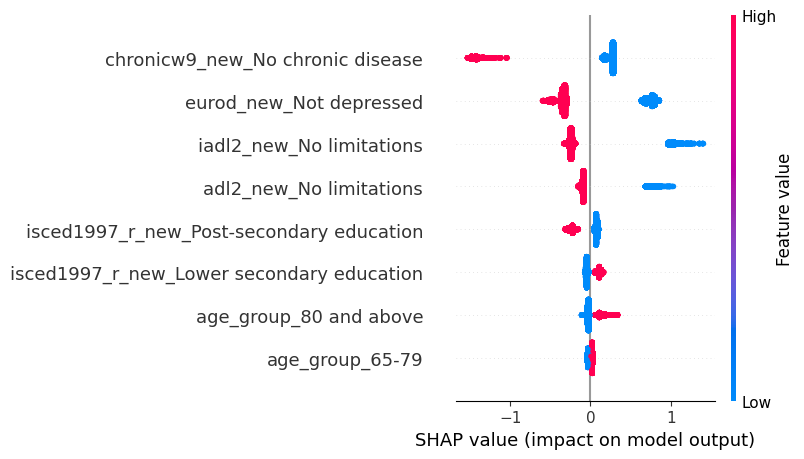


Generating SHAP Bar Plot (Average Absolute SHAP Value):


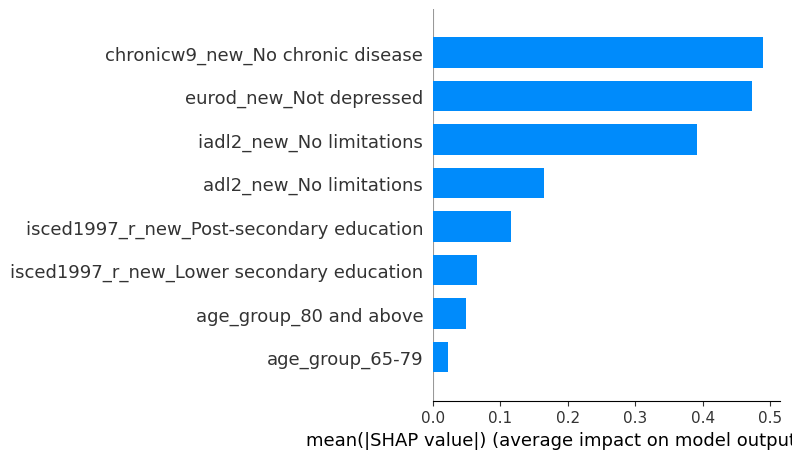

In [ ]:
# Use SHAP tree explainer to plot the feature importance of the  output variables of each folds for XGboot model only

!pip install shap

import shap
import matplotlib.pyplot as plt

# Assuming 'model_performance_results' contains the 'best_estimator' for XGBoost
# from the grid search procedure and X_all, y_all are the full dataset features and target.

print("\nGenerating SHAP Feature Importance Plots for XGBoost:")

# Find the best XGBoost estimator
xgb_estimator = None
if "XGBoost" in model_performance_results and model_performance_results["XGBoost"]["best_estimator"] is not None:
    xgb_estimator = model_performance_results["XGBoost"]["best_estimator"]
else:
    print("XGBoost best estimator not found in model_performance_results. Cannot generate SHAP plots.")

# Get feature names (assuming they are available from previous steps)
# If feature_names is not defined, try to get them from the encoded DataFrame
if 'feature_names' not in globals() or feature_names is None:
    target_column_name = 'sphus_new_Poor health'
    if 'df_encoded' in globals() and target_column_name in df_encoded.columns:
        feature_names = df_encoded.drop(target_column_name, axis=1).columns.tolist()
        print("Obtained feature names from df_encoded.")
    else:
        print("Could not obtain feature names. SHAP plots might use generic names.")
        feature_names = [f'feature_{i}' for i in range(X_all.shape[1])] # Create generic names


if xgb_estimator is not None and X_all is not None and y_all is not None:
    try:


        # Create Tree Explainer
        # Using a sample of the data can speed up SHAP value calculation
        # e.g., X_sample = shap.sample(X_all, 100)
        explainer = shap.TreeExplainer(xgb_estimator)

        # Calculate SHAP values
        # This can be computationally intensive for large datasets
        # Using X_all is needed to explain the model trained on X_all/y_all
        print("Calculating SHAP values (this may take a while)...")
        shap_values = explainer.shap_values(X_all)
        print("SHAP values calculated.")

        # Check the type of shap_values (can be a list of arrays for multi-output models, or a single array)
        # For a binary classifier like XGBoost, shap_values is usually a list of two arrays [shap_values_for_class_0, shap_values_for_class_1]
        # We typically plot the SHAP values for the positive class (class 1).
        if isinstance(shap_values, list):
            # Assuming class 1 is the positive class
            shap_values_to_plot = shap_values[1]
            print("Using SHAP values for the positive class (class 1).")
        else:
            # Single output model
            shap_values_to_plot = shap_values
            print("Using single output SHAP values.")


        # Plotting Feature Importance (Summary Plot)
        print("\nGenerating SHAP Summary Plot:")
        # Passing feature names to shap.summary_plot
        # Need to ensure the features in X_all correspond to feature_names
        if len(feature_names) == shap_values_to_plot.shape[1]:
            shap.summary_plot(shap_values_to_plot, features=X_all, feature_names=feature_names)
        else:
            print("Mismatch between number of feature names and SHAP values. Plotting with generic names.")
            shap.summary_plot(shap_values_to_plot, features=X_all)
        plt.show()

        # Plotting Feature Importance (Bar Plot - Average Magnitude)
        print("\nGenerating SHAP Bar Plot (Average Absolute SHAP Value):")
        if len(feature_names) == shap_values_to_plot.shape[1]:
            shap.summary_plot(shap_values_to_plot, features=X_all, feature_names=feature_names, plot_type="bar")
        else:
            print("Mismatch between number of feature names and SHAP values. Plotting with generic names.")
            shap.summary_plot(shap_values_to_plot, features=X_all, plot_type="bar")
        plt.show()


    except Exception as e:
        print(f"An error occurred during SHAP analysis: {e}")
        print("Please check if SHAP is installed (`!pip install shap`) and if the XGBoost model is trained correctly.")



Generating Precision-Recall Curve for XGBoost...
Using the best XGBoost model from the grid search results.


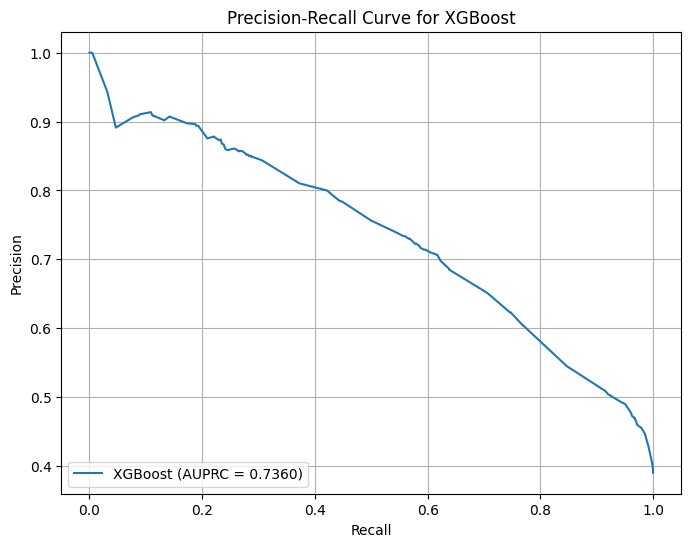


XGBoost AUPRC: 0.7360


In [ ]:
# plot the precision and recall curve for xgboost in a single plot

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Ensure X_test and y_test are available from previous data splitting
# Assuming X_test and y_test are defined and contain the test features and target labels

print("\nGenerating Precision-Recall Curve for XGBoost...")

# Find the trained XGBoost model from the 'models' dictionary
# Or, use the 'best_estimator' from the grid search results if preferred (as used in AUPRC plot)
xgb_model = None
if 'model_performance_results' in globals() and "XGBoost" in model_performance_results and model_performance_results["XGBoost"]["best_estimator"] is not None:
    xgb_model = model_performance_results["XGBoost"]["best_estimator"]
    print("Using the best XGBoost model from the grid search results.")
elif "XGBoost" in models: # Fallback to the 'models' dictionary if grid search results not available
    xgb_model = models["XGBoost"]
    print("Using the XGBoost model trained on the initial train/test split.")
else:
    print("XGBoost model not found. Cannot generate Precision-Recall curve.")


if xgb_model is not None and 'X_test' in globals() and 'y_test' in globals():
    # Check if the model has predict_proba method (required for PR curve)
    if hasattr(xgb_model, 'predict_proba'):
        try:
            # Get probability estimates for the positive class (assuming positive class is 1)
            y_prob = xgb_model.predict_proba(X_test)[:, 1]

            # Calculate Precision-Recall curve
            precision, recall, _ = precision_recall_curve(y_test, y_prob)

            # Calculate Area Under the Precision-Recall Curve (AUPRC)
            auprc = auc(recall, precision)

            # Plot the Precision-Recall curve
            plt.figure(figsize=(8, 6))
            plt.plot(recall, precision, label=f'XGBoost (AUPRC = {auprc:.4f})')

            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve for XGBoost')
            plt.legend(loc='lower left')
            plt.grid(True)
            plt.show()

            print(f"\nXGBoost AUPRC: {auprc:.4f}")

        except Exception as e:
            print(f"An error occurred while generating the PR curve for XGBoost: {e}")

    else:
        print("XGBoost model does not support probability prediction (predict_proba). Cannot generate PR curve.")
else:
    print("XGBoost model or test data (X_test, y_test) not available for generating PR curve.")


Probability Prediction and Calibration
Using the best XGBoost model from the initial comparison for calibration analysis.
Using test data (X_test, y_test) for calibration plots.
Relabeled bins to 9 contiguous bins.

Calibration Summary (Grouped by Predicted Probability Bins):


,Probability_Bin,Observed_Proportion_Poor,Average_Predicted_Prob,Total_Samples,min,max,Bin_Center_Prob
0,0,0.041139,0.066854,948,0.048502,0.073658,0.061080
1,1,0.136054,0.109787,441,0.085562,0.192395,0.138979
2,2,0.199367,0.243781,632,0.194903,0.260870,0.227886
3,3,0.278592,0.301681,1364,0.278774,0.307673,0.293224
4,4,0.383333,0.331235,900,0.319320,0.339997,0.329659
5,5,0.464037,0.467346,431,0.346344,0.545050,0.445697
6,6,0.615861,0.581691,807,0.545121,0.618287,0.581704
7,7,0.728597,0.679213,549,0.625404,0.786161,0.705782
8,8,0.878419,0.855677,658,0.788687,0.913753,0.851220


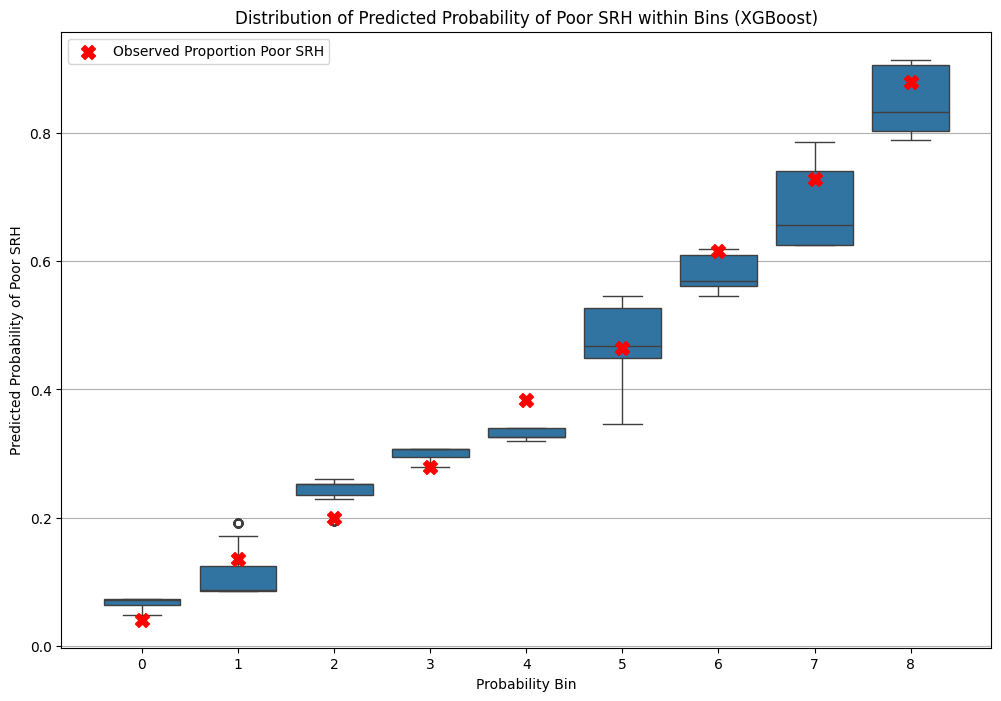


Generating Calibration Plot (Reliability Diagram):


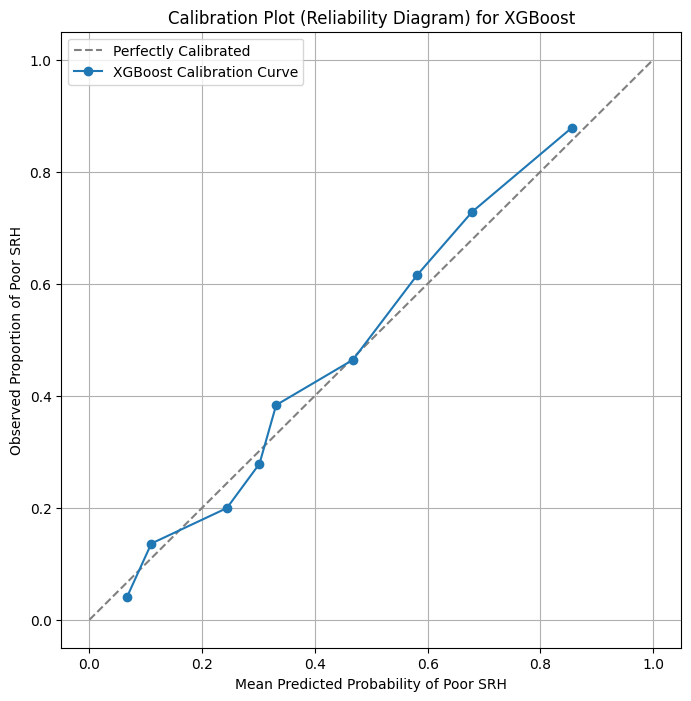

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Select the best XGBoost model from the results (assuming the last fold's best_estimator is representative)
# Or, if you saved the best model found during hyperparameter tuning, load that one.
# For this example, we'll use the 'best_estimator' from the last fold evaluation in `model_performance_results`.

print("\nProbability Prediction and Calibration")

best_xgb_model = None

# Check if model_performance_results exists and contains XGBoost before accessing it
if 'model_performance_results' in globals() and "XGBoost" in model_performance_results and model_performance_results["XGBoost"]["best_estimator"] is not None:
    best_xgb_model = model_performance_results["XGBoost"]["best_estimator"]
    print("Using the best XGBoost model from the initial comparison for calibration analysis.")
# You might also have a dedicated tuning result like `xgboost_tuning_results` from a previous cell
# elif 'xgboost_tuning_results' in globals() and xgboost_tuning_results.get("best_estimator") is not None:
#     best_xgb_model = xgboost_tuning_results["best_estimator"]
#     print("Using the best tuned XGBoost model for calibration analysis.")
else:
    print("XGBoost model not found for calibration. Cannot proceed.")


if best_xgb_model is not None and 'X_test' in globals() and 'y_test' in globals():

    # Prediction of the probability for an individual in the test set.
    # We should use the test set for calibration plots to assess how well the model
    # generalizes to unseen data.
    # Ensure X_test and y_test are available
    if 'X_test' not in globals() or 'y_test' not in globals():
        print("Test data (X_test, y_test) not found. Please ensure data splitting was successful.")
        # As a fallback, use X_all and y_all, but note this is not ideal for evaluating generalization
        print("Using full data (X_all, y_all) for calibration plots (not ideal for test set assessment).")
        X_data = X_all
        y_data = y_all
    else:
        X_data = X_test
        y_data = y_test
        print("Using test data (X_test, y_test) for calibration plots.")

    try:
        # Get probability predictions for the positive class ('Poor health' which is typically class 1)
        y_prob = best_xgb_model.predict_proba(X_data)[:, 1]

        # Combine actual target values and predicted probabilities into a DataFrame
        calibration_df = pd.DataFrame({'Actual_SRH_Poor': y_data, 'Predicted_Prob_Poor': y_prob})

        # Sort the DataFrame by predicted probability
        calibration_df = calibration_df.sort_values(by='Predicted_Prob_Poor').reset_index(drop=True)

        # Split the probability of poor SRH into bins.
        # Use pandas qcut to create bins based on quantiles, which helps distribute samples evenly.
        # Alternatively, use cut for fixed-width bins. qcut is often better for calibration.
        n_bins = 10  # Number of bins
        try:
            # Use `pd.qcut` with `retbins=True` to get bin edges for annotation later if needed
            calibration_df['Probability_Bin'], bin_edges = pd.qcut(calibration_df['Predicted_Prob_Poor'], q=n_bins, labels=False, duplicates='drop', retbins=True)

            # If qcut results in fewer bins due to duplicates, adjust n_bins if needed or note it
            if calibration_df['Probability_Bin'].nunique() < n_bins:
                actual_bins_count = calibration_df['Probability_Bin'].nunique()
                print(f"Warning: qcut resulted in {actual_bins_count} bins instead of {n_bins} due to duplicate probability values.")
                # Relabel bins if needed to be contiguous from 0 if duplicates created gaps
                actual_bins = calibration_df['Probability_Bin'].dropna().unique()
                if len(actual_bins) > 0:
                    bin_mapping = {old_label: new_label for new_label, old_label in enumerate(sorted(actual_bins))}
                    calibration_df['Probability_Bin'] = calibration_df['Probability_Bin'].map(bin_mapping)
                    print(f"Relabeled bins to {calibration_df['Probability_Bin'].nunique()} contiguous bins.")
                else:
                    print("No valid bins created after qcut.")
                    raise ValueError("Failed to create probability bins using qcut.")

        except ValueError as e:
            print(f"Error using pd.qcut for binning: {e}")
            # Fallback to cut if qcut fails, though qcut is usually better
            print("Attempting to use pd.cut for binning...")
            try:
                calibration_df['Probability_Bin'], bin_edges = pd.cut(calibration_df['Predicted_Prob_Poor'], bins=n_bins, labels=False, include_lowest=True, retbins=True)
                if calibration_df['Probability_Bin'].nunique() < n_bins:
                    print(f"Warning: cut resulted in {calibration_df['Probability_Bin'].nunique()} bins instead of {n_bins}.")
            except Exception as cut_e:
                print(f"Error using pd.cut for binning: {cut_e}")
                calibration_df['Probability_Bin'] = np.nan  # Assign NaN if both fail


        # Drop rows where binning failed (if any NaNs were introduced)
        calibration_df.dropna(subset=['Probability_Bin'], inplace=True)
        calibration_df['Probability_Bin'] = calibration_df['Probability_Bin'].astype(int)


        # Group by bin to calculate observed proportion and average predicted probability
        calibration_summary = calibration_df.groupby('Probability_Bin').agg(
            Observed_Proportion_Poor=('Actual_SRH_Poor', 'mean'),  # Mean of binary target gives proportion
            Average_Predicted_Prob=('Predicted_Prob_Poor', 'mean'),
            Total_Samples=('Actual_SRH_Poor', 'size')
        ).reset_index()

        # Add a column for the center of each bin's predicted probabilities for plotting
        # This requires getting the actual probability range for each bin.
        # Group by the bin and find the min/max predicted probability to get the range
        bin_ranges = calibration_df.groupby('Probability_Bin')['Predicted_Prob_Poor'].agg(['min', 'max']).reset_index()
        calibration_summary = calibration_summary.merge(bin_ranges, on='Probability_Bin')
        calibration_summary['Bin_Center_Prob'] = (calibration_summary['min'] + calibration_summary['max']) / 2

        # Print the calibration summary
        print("\nCalibration Summary (Grouped by Predicted Probability Bins):")
        display(calibration_summary)

        # Generate a boxplot to show the predicted self-rated health by bins.
        # This boxplot shows the distribution of predicted probabilities *within* each bin.
        plt.figure(figsize=(12, 8))
        sns.boxplot(x='Probability_Bin', y='Predicted_Prob_Poor', data=calibration_df)
        plt.xlabel('Probability Bin')
        plt.ylabel('Predicted Probability of Poor SRH')
        plt.title('Distribution of Predicted Probability of Poor SRH within Bins (XGBoost)')
        plt.grid(axis='y')

        # Overlay observed proportion on the boxplot
        # We plot the observed proportion at the center of the bin's predicted probabilities
        # or at the bin label on the x-axis. Using the bin label is simpler for the boxplot.
        # Ensure the x-axis labels match the bins.
        # The x-axis of the boxplot corresponds to the integer labels of the bins (0, 1, 2, ...).
        plt.scatter(calibration_summary['Probability_Bin'], calibration_summary['Observed_Proportion_Poor'],
                    color='red', marker='X', s=100, label='Observed Proportion Poor SRH', zorder=5) # zorder to ensure it's on top

        plt.legend()
        plt.show()

        # Calibration Plot (Reliability Diagram)
        # This plot directly compares the average predicted probability in each bin
        # to the observed proportion in that bin.
        print("\nGenerating Calibration Plot (Reliability Diagram):")
        plt.figure(figsize=(8, 8))
        # Plot the perfect calibration line (predicted_prob = observed_proportion)
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

        # Plot the calibration curve (average predicted prob vs observed proportion)
        plt.plot(calibration_summary['Average_Predicted_Prob'], calibration_summary['Observed_Proportion_Poor'], marker='o', linestyle='-', label='XGBoost Calibration Curve')

        plt.xlabel('Mean Predicted Probability of Poor SRH')
        plt.ylabel('Observed Proportion of Poor SRH')
        plt.title('Calibration Plot (Reliability Diagram) for XGBoost')
        plt.legend()
        plt.grid(True)
        plt.show()



    except AttributeError:
        print("Selected model does not have predict_proba method. Cannot perform probability-based calibration plots.")
    except Exception as e:
        print(f"An error occurred during calibration analysis: {e}")
        print("Please ensure the selected model has predict_proba method and X_test, y_test are available.")

else:
    print("Selected XGBoost model or test data not available for calibration analysis.")